# TCC PUC-Minas Gastão Jucá Filho <br>
Turma Puc-Minas Virtual - nov2019 <br>


#  Atividades previstas para o exercício:
> 1. Carregar a tabela olist_ibge_v11  

> 2. Complementar a Análise Exploratória dos Dados

##  1 - Importação de bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.options.display.max_columns = 100


## 2 - Importação da tabela <font color=red>'olist_ibge_v11'</font> 

In [2]:
olist_ibge_v11 = pd.read_excel('olist_ibge_v11.xlsx', sheet_name = "Sheet1", header = 0, index_col=None) # sem dtype = 'object'

In [3]:
olist_ibge_v11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
Unnamed: 0               92935 non-null int64
order_id                 92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
d

### 2.1 - Deletar a coluna  <font color=red>'Unnamed: 0'</font>  
> Ela é um ruído que sempre surge ao importarmos um arquivo para um DataFrame

In [4]:
olist_ibge_v12 = olist_ibge_v11.drop(['Unnamed: 0'], axis=1)

In [5]:
olist_ibge_v12.shape, olist_ibge_v11.shape

((92935, 18), (92935, 19))

In [6]:
olist_ibge_v12.head()

,order_id,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,product_id,seller_id,product_category_name,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias,sigla_state,seller_sigla_state
0,50ba38c4dc467baab1ea2c8c7747934d,5,0,1,0,0,219.63,10,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,881.06,7037,"180,088.78",0.65,21.11,mg,rs
1,d99e6849f7676dade195f20c26f0eb4f,5,0,1,0,0,135.59,1,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,881.06,7037,"180,088.78",0.65,5.84,mg,sp
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,5,1,0,0,0,58.28,1,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,881.06,7037,"180,088.78",0.65,8.63,mg,rj
3,3f1294f87d79b57f5d55ba7b80c3d94f,4,0,1,0,0,"1,025.52",8,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,"1,045.13",18427,"287,984.49",0.73,29.10,go,sp
4,6c12feac9a308e1382d9b19cca7f20b2,4,0,1,0,0,220.97,4,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,"1,817.07",23574,"430,235.36",0.66,4.80,mg,mg


### 2.2 - Mudar ordem das colunas de  <font color=red>'olist_ibge_v12'</font>  
> Para manter as categóricas juntas.

In [7]:
olist_ibge_v12.columns

Index(['order_id', 'review_score', 'qtde_boleto', 'qtde_credit_card',
       'qtde_debit_card', 'qtde_voucher', 'soma_payment', 'qtde_installments',
       'product_id', 'seller_id', 'product_category_name', 'AR_MUN_2018',
       'POPULAÇÃO ESTIMADA', 'PIB', 'gini', 'dias', 'sigla_state',
       'seller_sigla_state'],
      dtype='object')

In [8]:
# df = df[['e','c','b','f','d','a']]

olist_ibge_v13 = olist_ibge_v12[['order_id','product_id', 'seller_id', 'product_category_name', 'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto', 'qtde_credit_card',
       'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini', 'dias']]

In [9]:
# Esqueci algo?
olist_ibge_v13.shape, olist_ibge_v12.shape

((92935, 18), (92935, 18))

In [10]:
# No, it's O.K.

In [11]:
olist_ibge_v13.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state,review_score,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs,5,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp,5,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj,5,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp,4,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg,4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80


In [12]:
olist_ibge_v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 18 columns):
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
dtypes: float64(5), int64(7), object(6)
memory 

In [13]:
# 06 (seis) campos string e 12 (doze) campos numéricos.

## 3 - Separação das variáveis por tipo

In [14]:
# Variáveis Categóricas
# order_id                          object
# product_id                        object
# seller_id                         object
# product_category_name             object
# sigla_state                        object
# seller_sigla_state                 object

# Variáveis Quantitativas

# qtde_boleto                        int64
# qtde_credit_card                   int64
# qtde_debit_card                    int64
# qtde_voucher                       int64
# soma_payment                     float64
# qtde_installments                  int64
# AR_MUN_2018                      float64
# POPULAÇÃO ESTIMADA                 int64
# PIB                              float64
# gini                             float64
# dias                             float64

# Variável Target
# review_score                       int64

## 4 -  AED das variáveis quantitativas

# <font color=green>'ABRE Parêntese para incluir coluna 'humor' p/ Análise Bivariada'</font>

In [15]:
olist_ibge_v13.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias'],
      dtype='object')

In [16]:
# Nova coluna chamada 'humor' será 0 (zero), quando review_score for de 1 a 3, ou 1 (um), quando review_score for 4 ou 5.
a = {1:0, 2:0, 3:0 , 4:1, 5:1}
olist_ibge_v13['humor'] = olist_ibge_v13['review_score'].map(a)

D:\anaconda\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
olist_ibge_v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
humor                    92935 non-null int64
d

### 4.1 -  Criação de dataframe com variáveis quantitativas  
> Exceto a variável target que é 'review_score'

In [18]:
olist_ibge_v13.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias', 'humor'],
      dtype='object')

In [19]:
quantitativas = olist_ibge_v13[['qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias']]            

In [20]:
# cria DataFrame 'quantitativas_humor' que contém a coluna 'humor', pois as duas variáveis sob análise bivariada precisam estar
# sob o mesmo, digamos assim, teto.

In [21]:
quantitativas_humor = olist_ibge_v13[['qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias', 'humor']]            

In [22]:
quantitativas.head()

,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
0,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11
1,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84
2,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63
3,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10
4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80


In [23]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 11 columns):
qtde_boleto           92935 non-null int64
qtde_credit_card      92935 non-null int64
qtde_debit_card       92935 non-null int64
qtde_voucher          92935 non-null int64
soma_payment          92935 non-null float64
qtde_installments     92935 non-null int64
AR_MUN_2018           92935 non-null float64
POPULAÇÃO ESTIMADA    92935 non-null int64
PIB                   92935 non-null float64
gini                  92935 non-null float64
dias                  92935 non-null float64
dtypes: float64(5), int64(6)
memory usage: 7.8 MB


### 4.2 - Estatística descritiva das variáveis quantitativas

In [24]:
quantitativas.describe()

,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
count,"92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00","92,935.00"
mean,0.20,0.77,0.02,0.06,160.50,2.93,"1,279.54","2,826,551.15","151,772,033.94",0.79,12.56
std,0.40,0.43,0.12,0.41,219.69,2.72,"3,553.72","4,325,960.32","247,687,238.20",0.11,9.51
min,0.00,0.00,0.00,0.00,0.00,0.00,3.56,838.00,"14,959.96",0.35,0.53
25%,0.00,1.00,0.00,0.00,62.01,1.00,318.68,"102,268.00","2,921,663.24",0.74,6.79
50%,0.00,1.00,0.00,0.00,105.28,2.00,693.83,"477,798.00","18,469,475.89",0.80,10.22
75%,0.00,1.00,0.00,0.00,177.28,4.00,"1,521.11","2,938,092.00","88,277,462.53",0.87,15.71
max,1.00,2.00,2.00,25.00,"13,664.08",24.00,"159,533.33","12,038,175.00","687,035,889.61",0.99,209.63


### 4.3 - Correlação das variáveis quantitativas

In [25]:
quantitativas.corr()

,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
qtde_boleto,1.00,-0.90,-0.06,-0.07,-0.04,-0.35,0.01,-0.04,-0.03,-0.03,0.05
qtde_credit_card,-0.90,1.00,-0.23,-0.07,0.05,0.39,-0.00,0.03,0.02,0.02,-0.04
qtde_debit_card,-0.06,-0.23,1.00,-0.02,-0.01,-0.09,-0.00,0.01,0.01,0.00,-0.02
qtde_voucher,-0.07,-0.07,-0.02,1.00,-0.01,-0.07,-0.01,0.00,0.00,0.01,0.00
soma_payment,-0.04,0.05,-0.01,-0.01,1.00,0.32,0.03,-0.03,-0.04,0.00,0.07
qtde_installments,-0.35,0.39,-0.09,-0.07,0.32,1.00,0.01,-0.06,-0.06,-0.01,0.05
AR_MUN_2018,0.01,-0.00,-0.00,-0.01,0.03,0.01,1.00,0.03,0.05,0.10,0.08
POPULAÇÃO ESTIMADA,-0.04,0.03,0.01,0.00,-0.03,-0.06,0.03,1.00,1.00,0.46,-0.17
PIB,-0.03,0.02,0.01,0.00,-0.04,-0.06,0.05,1.00,1.00,0.45,-0.18
gini,-0.03,0.02,0.00,0.01,0.00,-0.01,0.10,0.46,0.45,1.00,-0.05


### 4.4 Mapa de calor da correlação das variáveis quantitativas

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(quantitativas.corr(), annot=True)

### 4.5 Gráficos de pares de variáveis

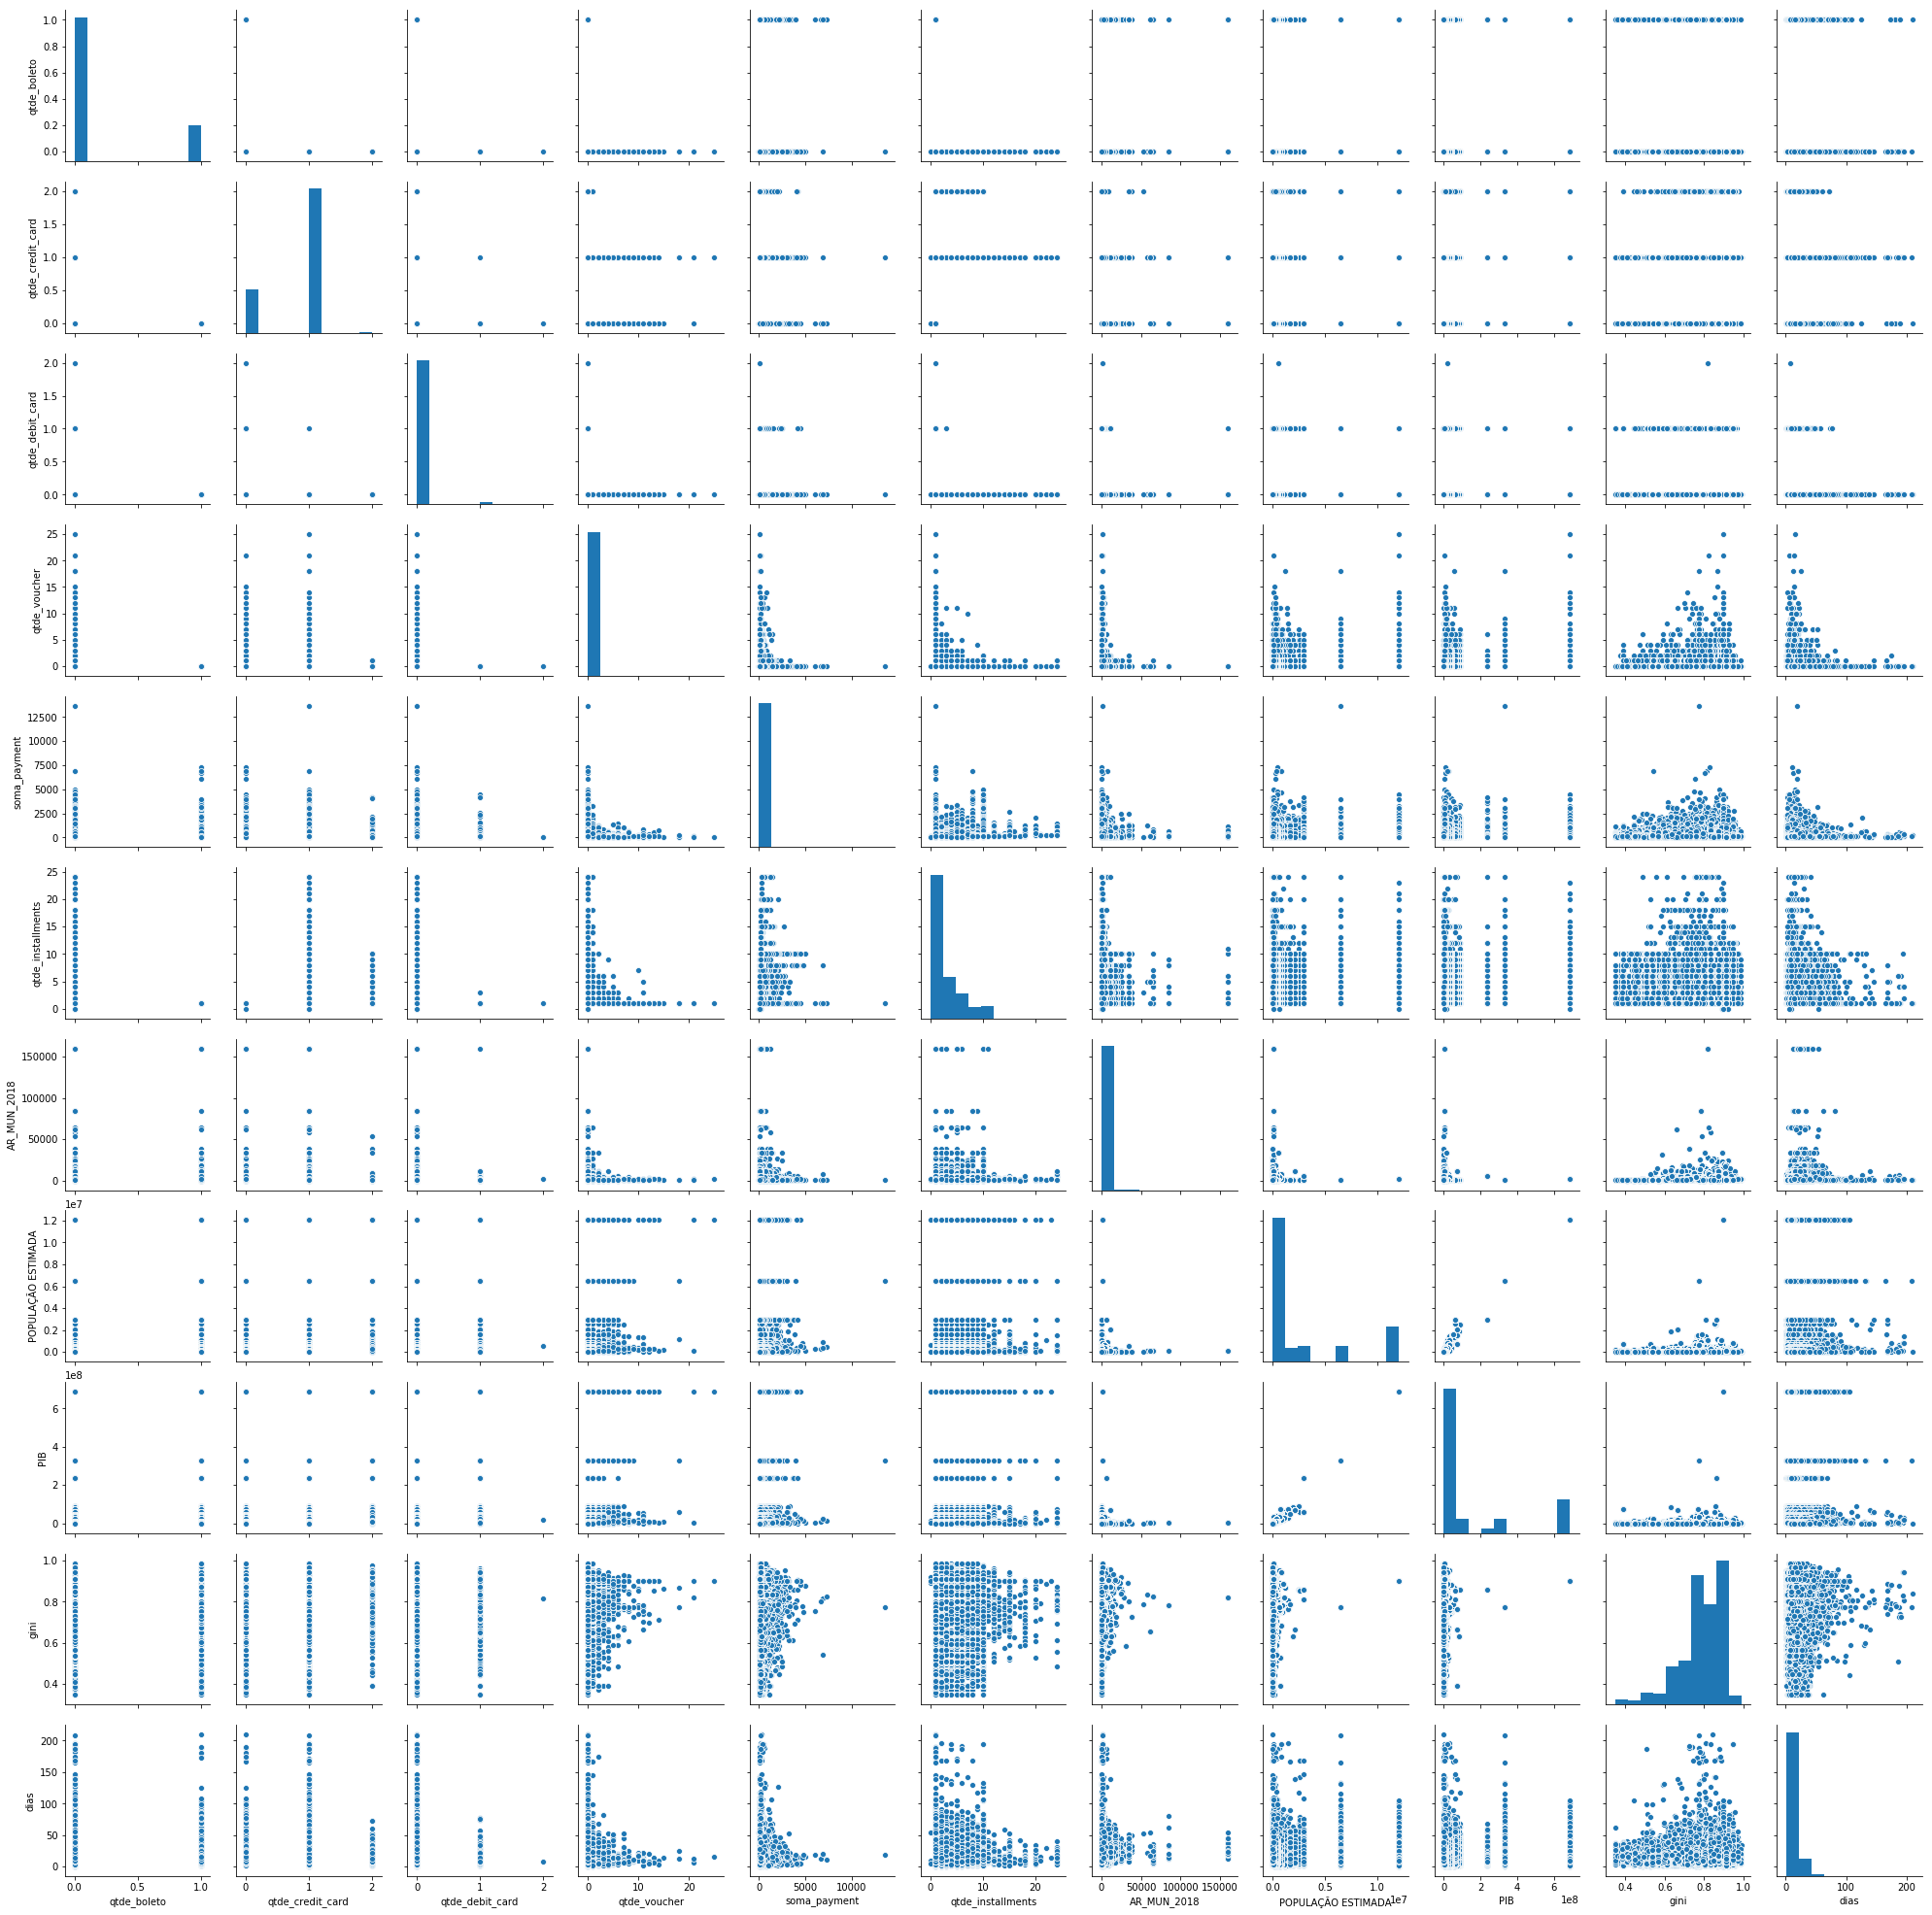

In [27]:
# import seaborn as sns #; sns.set(style="ticks", color_codes=True)
sns.pairplot(quantitativas)

##### Há correlação perfeita entre 'POPULAÇÃO ESTIMADA'  e 'PIB'
> Vamos plotar somente as duas para observar melhor

In [28]:
par_pib_pop = olist_ibge_v13[['POPULAÇÃO ESTIMADA', 'PIB']] 

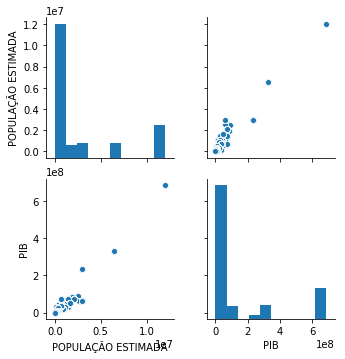

In [29]:
sns.pairplot(par_pib_pop)

In [30]:
# Sim, correlação. Poderíamos deletar a variável 'POPULAÇÃO ESTIMADA'

### 4.6 Histogramas

#### 4.6.1 PIB

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N° Ocorrências')

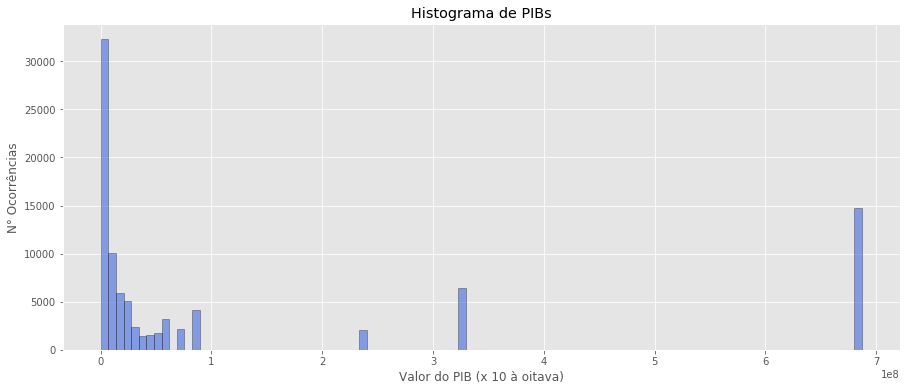

In [32]:
# olist_ibge_v13.hist(column='PIB', bins = 100)
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["PIB"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de PIBs")
plt.xlabel("Valor do PIB (x 10 à oitava)")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

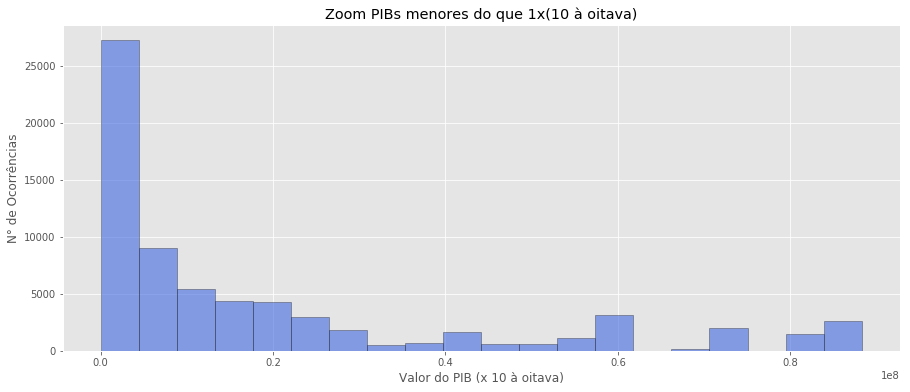

In [33]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["PIB"] < 100000000]["PIB"].hist(bins = 20, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom PIBs menores do que 1x(10 à oitava)")
plt.xlabel("Valor do PIB (x 10 à oitava)")
plt.ylabel("N° de Ocorrências")

#### 4.6.2 gini

Text(0, 0.5, 'N° Ocorrências')

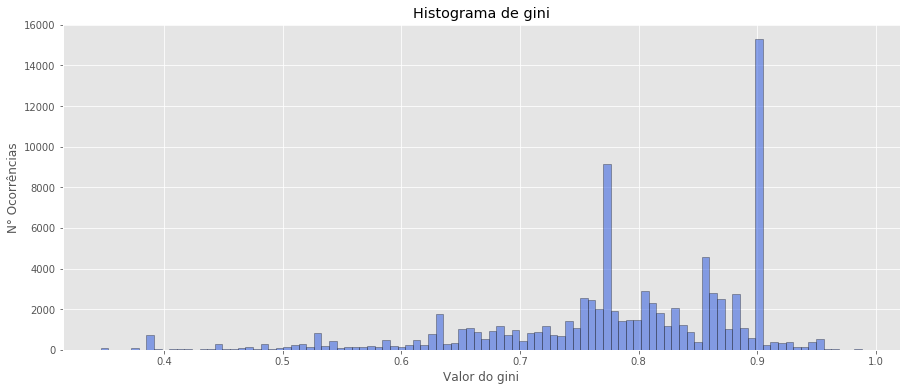

In [34]:
# olist_ibge_v13.hist(column='gini', bins = 50)
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["gini"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de gini")
plt.xlabel("Valor do gini")
plt.ylabel("N° Ocorrências")

#### 4.6.3 AR_MUN_2018

Text(0, 0.5, 'N° Ocorrências')

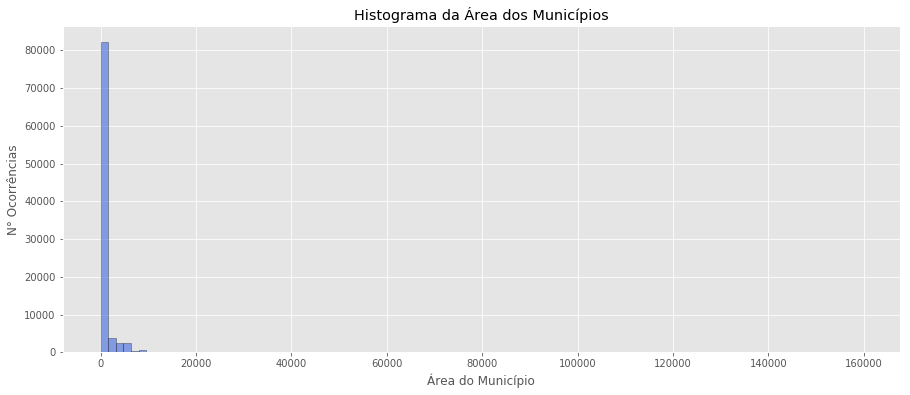

In [35]:
# olist_ibge_v13.hist(column='AR_MUN_2018', bins = range(0, 40000, 500))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["AR_MUN_2018"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma da Área dos Municípios")
plt.xlabel("Área do Município")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

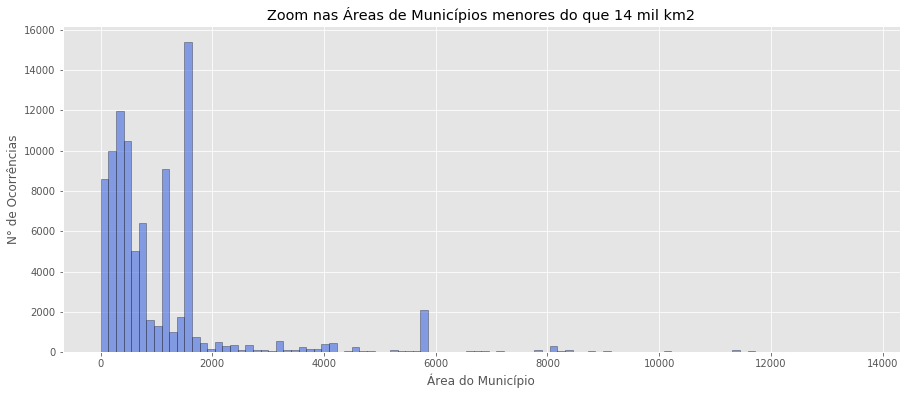

In [36]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["AR_MUN_2018"] < 14000]["AR_MUN_2018"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nas Áreas de Municípios menores do que 14 mil km2")
plt.xlabel("Área do Município")
plt.ylabel("N° de Ocorrências")

#### 4.6.4 dias

Text(0, 0.5, 'N° Ocorrências')

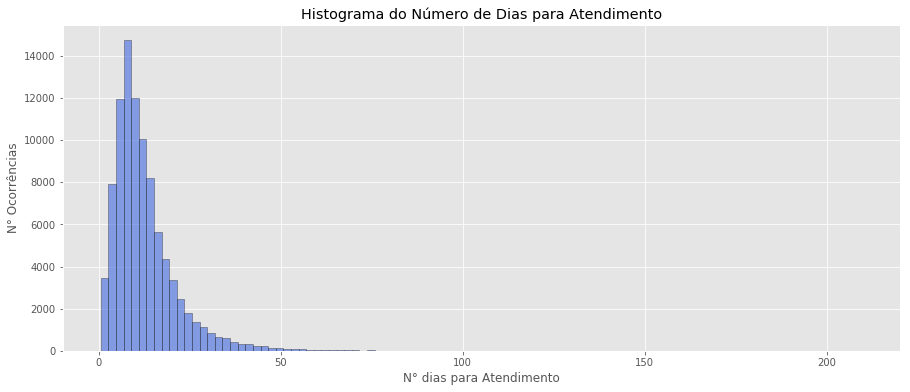

In [37]:
# olist_ibge_v13.hist(column='dias', bins = 20)
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["dias"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma do Número de Dias para Atendimento")
plt.xlabel("N° dias para Atendimento")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

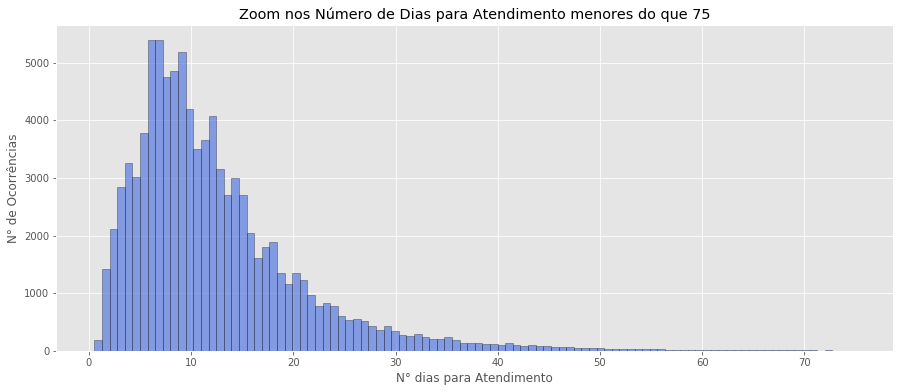

In [38]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["dias"] < 75]["dias"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nos Número de Dias para Atendimento menores do que 75")
plt.xlabel("N° dias para Atendimento")
plt.ylabel("N° de Ocorrências")

#### 4.6.5 soma_payment

Text(0, 0.5, 'N° Ocorrências')

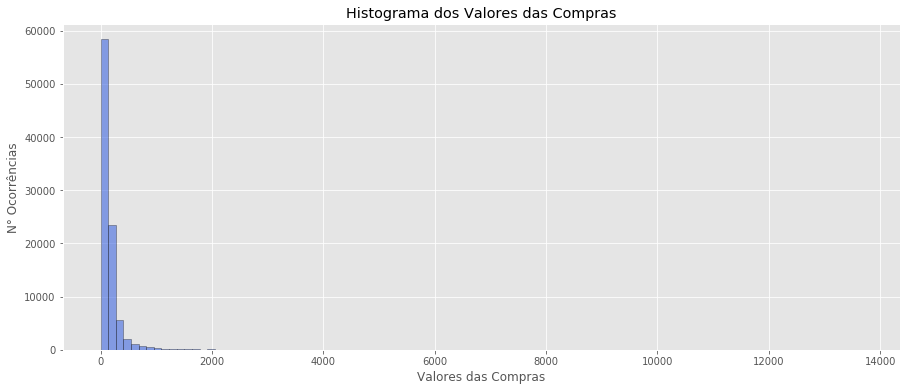

In [39]:
# olist_ibge_v13.hist(column='soma_payment', bins = range(0, 1500, 50))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["soma_payment"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma dos Valores das Compras")
plt.xlabel("Valores das Compras")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

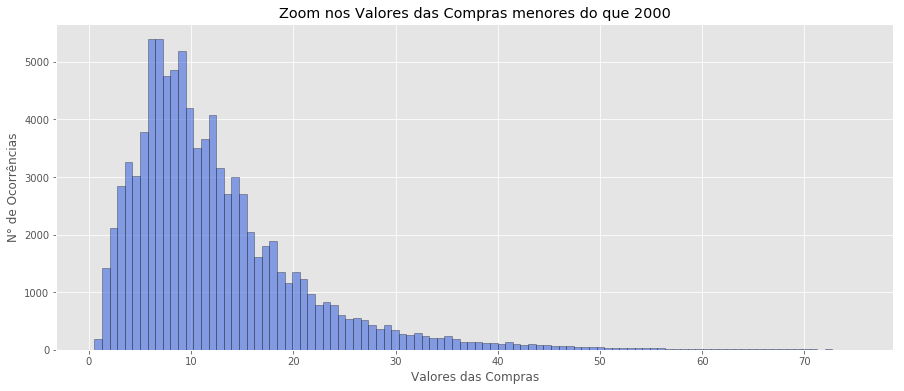

In [40]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["dias"] < 75]["dias"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nos Valores das Compras menores do que 2000")
plt.xlabel("Valores das Compras")
plt.ylabel("N° de Ocorrências")

#### 4.6.6 POPULAÇÃO ESTIMADA

Text(0, 0.5, 'N° Ocorrências')

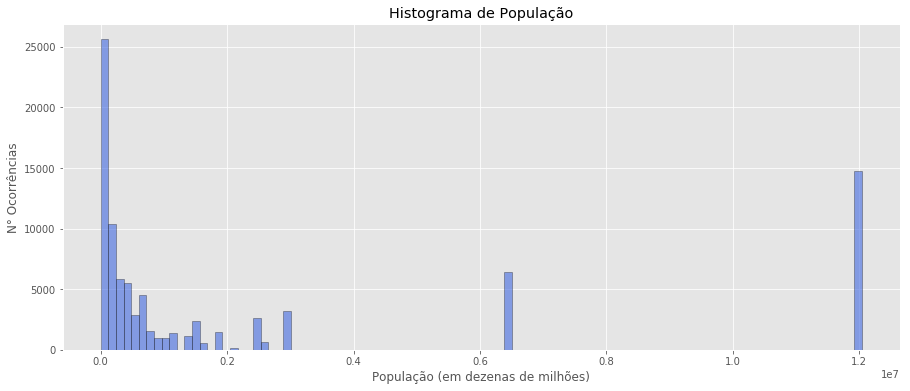

In [41]:
# olist_ibge_v13.hist(column='POPULAÇÃO ESTIMADA', bins = 50)
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["POPULAÇÃO ESTIMADA"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de População")
plt.xlabel("População (em dezenas de milhões)")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

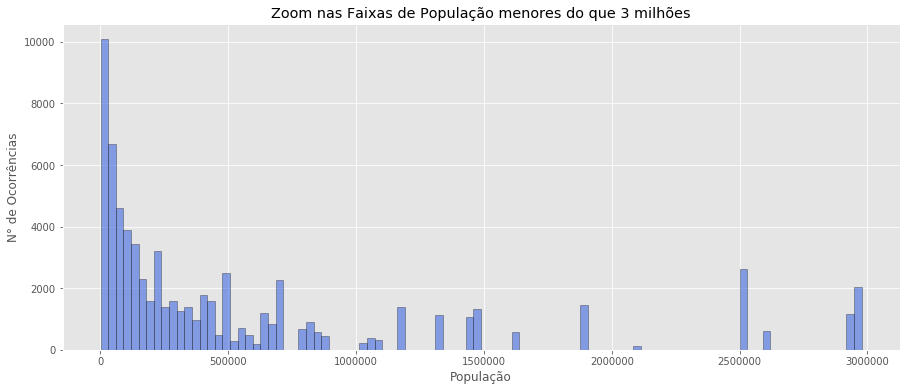

In [42]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["POPULAÇÃO ESTIMADA"] < 4000000]["POPULAÇÃO ESTIMADA"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nas Faixas de População menores do que 3 milhões")
plt.xlabel("População")
plt.ylabel("N° de Ocorrências")

#### 4.6.7 qtde_boleto

Text(0, 0.5, 'N° Ocorrências')

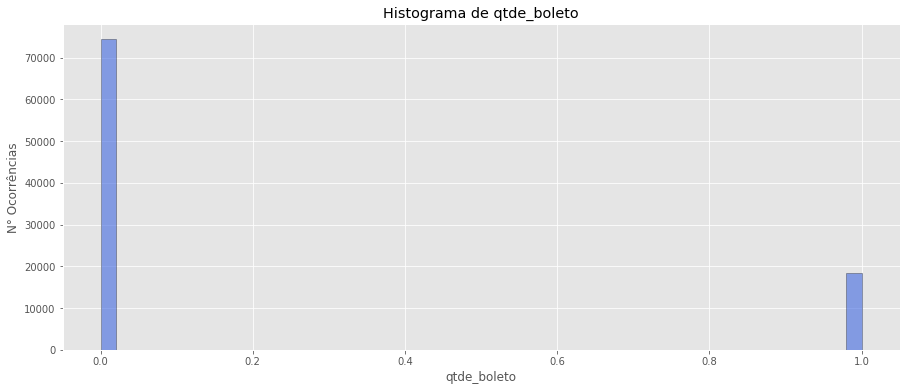

In [43]:
# olist_ibge_v13.hist(column='qtde_boleto', bins = range(0, 5, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["qtde_boleto"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de qtde_boleto")
plt.xlabel("qtde_boleto")
plt.ylabel("N° Ocorrências")

#### 4.6.8 qtde_credit_card

Text(0, 0.5, 'N° Ocorrências')

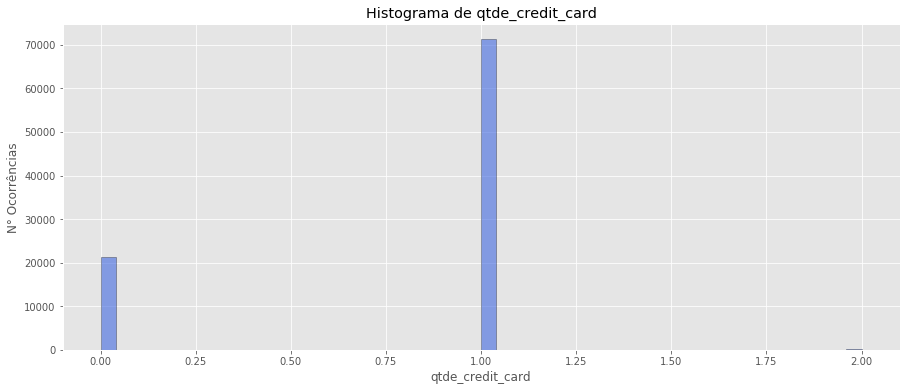

In [44]:
# olist_ibge_v13.hist(column='qtde_credit_card', bins = range(0, 5, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["qtde_credit_card"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de qtde_credit_card")
plt.xlabel("qtde_credit_card")
plt.ylabel("N° Ocorrências")

#### 4.6.9 qtde_debit_card

Text(0, 0.5, 'N° Ocorrências')

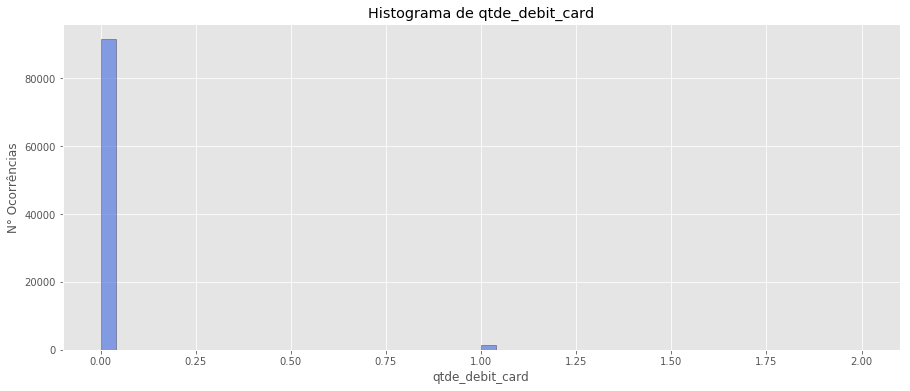

In [45]:
# olist_ibge_v13.hist(column='qtde_debit_card', bins = range(0, 4, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["qtde_debit_card"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de qtde_debit_card")
plt.xlabel("qtde_debit_card")
plt.ylabel("N° Ocorrências")

#### 4.6.10 qtde_voucher

Text(0, 0.5, 'N° Ocorrências')

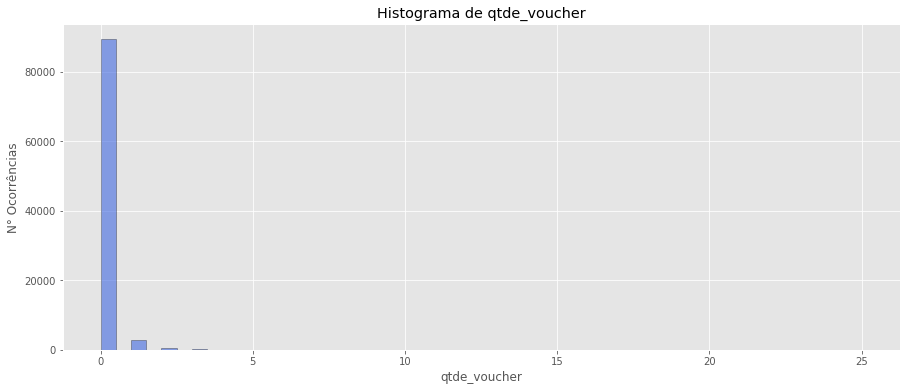

In [46]:
# olist_ibge_v13.hist(column='qtde_voucher', bins = range(0, 19, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["qtde_voucher"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de qtde_voucher")
plt.xlabel("qtde_voucher")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

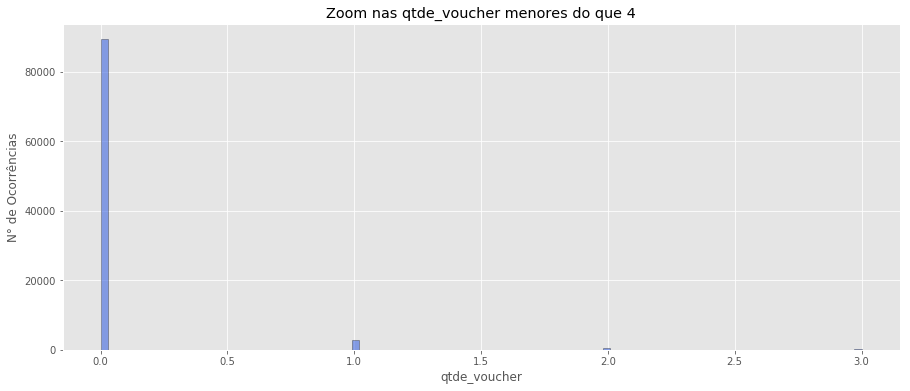

In [47]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["qtde_voucher"] < 4]["qtde_voucher"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nas qtde_voucher menores do que 4")
plt.xlabel("qtde_voucher")
plt.ylabel("N° de Ocorrências")

#### 4.6.11 qtde_installments

Text(0, 0.5, 'N° Ocorrências')

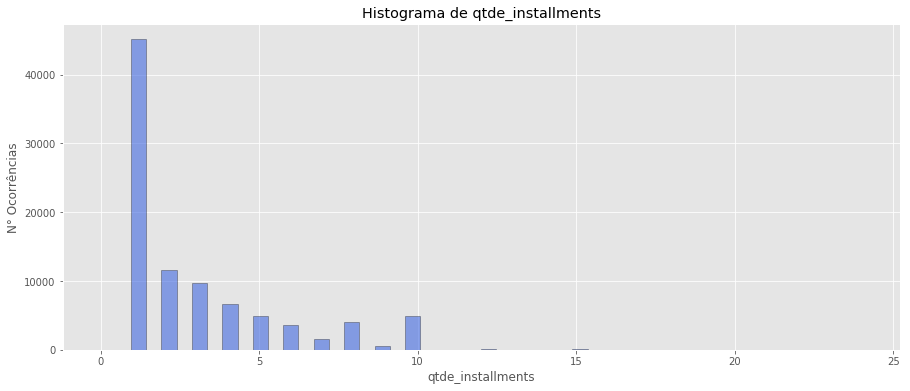

In [48]:
# olist_ibge_v13.hist(column='qtde_installments', bins = range(1, 17, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
quantitativas["qtde_installments"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de qtde_installments")
plt.xlabel("qtde_installments")
plt.ylabel("N° Ocorrências")

Text(0, 0.5, 'N° de Ocorrências')

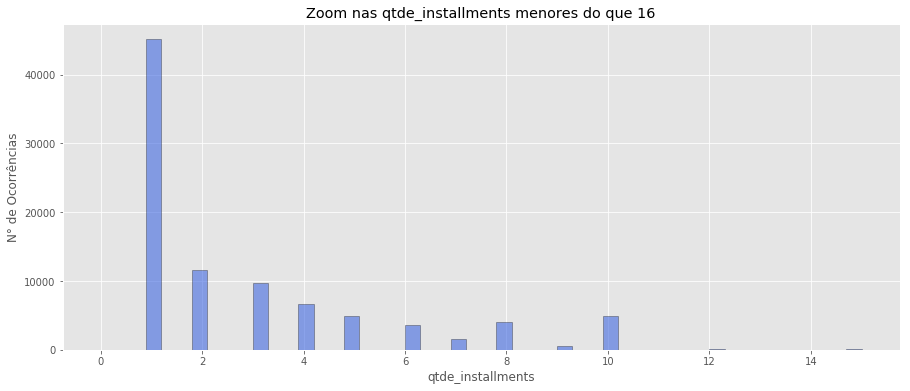

In [49]:
plt.figure(figsize = (15, 6))
quantitativas[quantitativas["qtde_installments"] < 16]["qtde_installments"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Zoom nas qtde_installments menores do que 16")
plt.xlabel("qtde_installments")
plt.ylabel("N° de Ocorrências")

### 4.7 Valores únicos

In [50]:
quantitativas.columns

Index(['qtde_boleto', 'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher',
       'soma_payment', 'qtde_installments', 'AR_MUN_2018',
       'POPULAÇÃO ESTIMADA', 'PIB', 'gini', 'dias'],
      dtype='object')

In [51]:
print('qtde de valores únicos de qtde_boleto é ', len(quantitativas['qtde_boleto'].unique()))
print('qtde de valores únicos de qtde_credit_card é ', len(quantitativas['qtde_credit_card'].unique()))
print('qtde de valores únicos de qtde_debit_card é ', len(quantitativas['qtde_debit_card'].unique()))
print('qtde de valores únicos de qtde_voucher é ', len(quantitativas['qtde_voucher'].unique()))
print('qtde de valores únicos de soma_payment é ', len(quantitativas['soma_payment'].unique()))
print('qtde de valores únicos de qtde_installments é ', len(quantitativas['qtde_installments'].unique()))
print('qtde de valores únicos de AR_MUN_2018 é ', len(quantitativas['AR_MUN_2018'].unique()))
print('qtde de valores únicos de POPULAÇÃO ESTIMADA é ', len(quantitativas['POPULAÇÃO ESTIMADA'].unique()))
print('qtde de valores únicos de PIB é ', len(quantitativas['PIB'].unique()))
print('qtde de valores únicos de gini é ', len(quantitativas['gini'].unique()))
print('qtde de valores únicos de dias é ', len(quantitativas['dias'].unique()))

qtde de valores únicos de qtde_boleto é  2
qtde de valores únicos de qtde_credit_card é  3
qtde de valores únicos de qtde_debit_card é  3
qtde de valores únicos de qtde_voucher é  19
qtde de valores únicos de soma_payment é  26777
qtde de valores únicos de qtde_installments é  24
qtde de valores únicos de AR_MUN_2018 é  3968
qtde de valores únicos de POPULAÇÃO ESTIMADA é  3794
qtde de valores únicos de PIB é  3972
qtde de valores únicos de gini é  3970
qtde de valores únicos de dias é  90468


In [52]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "valores_unicos.PNG")

In [53]:
# Listagem dos valors únicos de 'qtde_boleto'
quantitativas['qtde_boleto'].unique()

array([0, 1], dtype=int64)

In [54]:
# Listagem dos valors únicos de 'qtde_credit_card '
quantitativas['qtde_credit_card'].unique()

array([1, 0, 2], dtype=int64)

In [55]:
# Listagem dos valors únicos de 'qtde_debit_card '
quantitativas['qtde_debit_card'].unique()

array([0, 1, 2], dtype=int64)

In [56]:
# Listagem dos valors únicos de 'qtde_voucher '
quantitativas['qtde_voucher'].unique()

array([ 0,  1,  6,  2,  3,  4,  5, 11,  7,  8, 15, 10, 18, 14, 12,  9, 13,
       21, 25], dtype=int64)

In [57]:
# Listagem dos valors únicos de 'qtde_installments '
quantitativas['qtde_installments'].unique()

array([10,  1,  8,  4,  6,  9,  3,  5,  2,  7, 13, 11, 15, 18, 12, 20, 24,
       17, 14,  0, 21, 16, 22, 23], dtype=int64)

### 4.8 - Alguns Gráficos Pizza

#### 4.8.1 - qtde_boleto

In [58]:
# Series com qtde de 'qtde_boleto'
qtde_boleto_agrupados = olist_ibge_v13.groupby('qtde_boleto')['order_id'].count()

In [59]:
# transformação do Series em DataFrame
df_qtde_boleto_agrupados = pd.DataFrame(qtde_boleto_agrupados)

In [60]:
df_qtde_boleto_agrupados

,order_id
qtde_boleto,
0,74432
1,18503


In [61]:
# criação de coluna com o percentual, a ser usado no gráfico pizza
df_qtde_boleto_agrupados['perc(%)'] = df_qtde_boleto_agrupados['order_id']*100/(74432+18503)

In [62]:
df_qtde_boleto_agrupados

,order_id,perc(%)
qtde_boleto,,
0,74432,80.09
1,18503,19.91


In [63]:
quantitativas['qtde_boleto'].unique()

array([0, 1], dtype=int64)

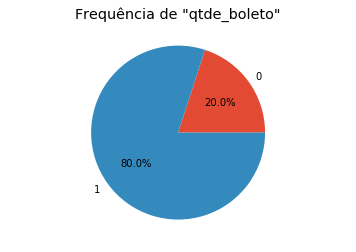

In [64]:
percentual = [20, 80]
labels_list = ['0', '1']
import matplotlib.pyplot as plt
plt.axis('equal')
plt.pie(percentual, labels = labels_list, autopct='%1.1f%%')
plt.title('Frequência de "qtde_boleto"')
plt.show()

#### 4.8.2 - qtde_credit_card

In [65]:
qtde_credit_card_agrupados = olist_ibge_v13.groupby('qtde_credit_card')['order_id'].count()

In [66]:
df_qtde_credit_card_agrupados = pd.DataFrame(qtde_credit_card_agrupados)

In [67]:
df_qtde_credit_card_agrupados

,order_id
qtde_credit_card,
0,21375
1,71290
2,270


In [68]:
df_qtde_credit_card_agrupados['perc'] = df_qtde_boleto_agrupados['order_id']*100/(21375+71290+270)

In [69]:
df_qtde_credit_card_agrupados

,order_id,perc
qtde_credit_card,,
0,21375,80.09
1,71290,19.91
2,270,nan


In [70]:
quantitativas['qtde_credit_card'].unique()

array([1, 0, 2], dtype=int64)

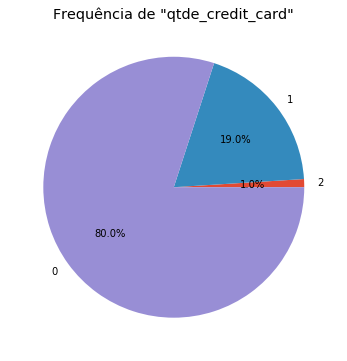

In [71]:
percentual = [1, 19, 80]
labels_list = ['2', '1' ,'0']
# plt.axis('equal')


plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
# quantitativas["qtde_installments"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
# plt.title("Histograma Faixas de qtde_installments")
# plt.xlabel("Faixa de qtde_installments")
# plt.ylabel("N° Ocorrências")



plt.pie(percentual, labels = labels_list, autopct='%1.1f%%')
plt.title('Frequência de "qtde_credit_card"')
plt.show()



#### 4.8.3 - qtde_debit_card

In [72]:
qtde_debit_card_agrupados = olist_ibge_v13.groupby('qtde_debit_card')['order_id'].count()

In [73]:
df_qtde_debit_card_agrupados = pd.DataFrame(qtde_debit_card_agrupados)

In [74]:
df_qtde_debit_card_agrupados

,order_id
qtde_debit_card,
0,91517
1,1417
2,1


In [75]:
df_qtde_debit_card_agrupados['perc'] = df_qtde_debit_card_agrupados['order_id']*100/(91517+1417+1)

In [76]:
df_qtde_debit_card_agrupados

,order_id,perc
qtde_debit_card,,
0,91517,98.47
1,1417,1.52
2,1,0.00


In [77]:
quantitativas['qtde_debit_card'].unique()

array([0, 1, 2], dtype=int64)

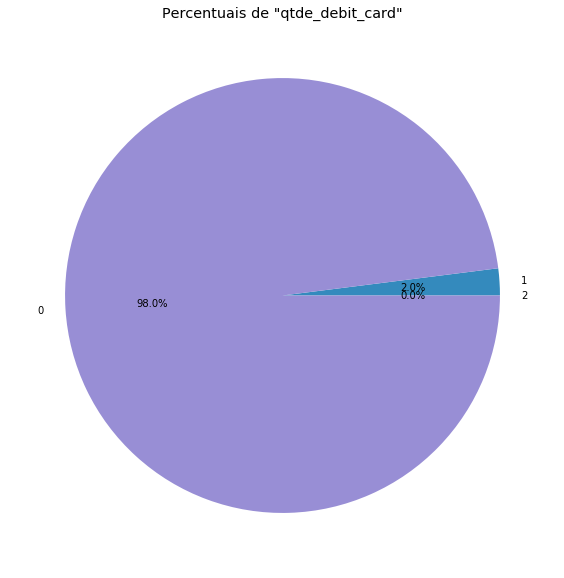

In [78]:
percentual = [0, 2, 98]
labels_list = ['2', '1' ,'0']
# plt.axis('equal')

# plt.style.use("ggplot")
plt.figure(figsize = (10, 10))

plt.pie(percentual, labels = labels_list, autopct='%1.1f%%')
plt.title('Percentuais de "qtde_debit_card"')
plt.show()

#### 4.8.4 - Demais campos numéricos não se ajustam a gráfico tipo pizza

### 4.9 - Alvo 'review_score' - histograma e gráfico pizza

Text(0, 0.5, 'N° Ocorrências')

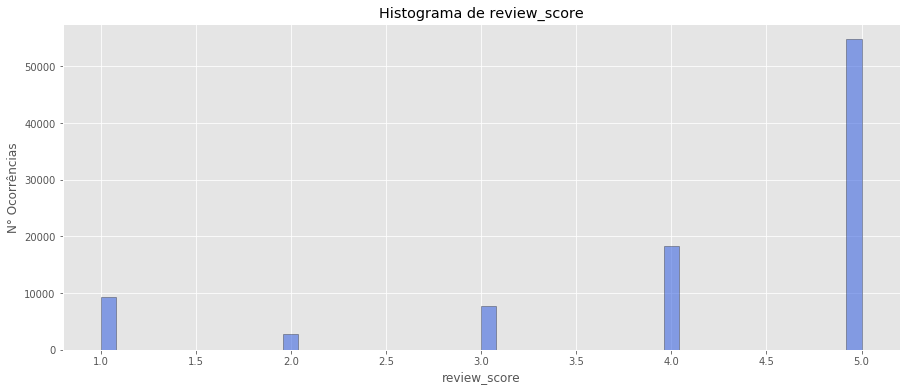

In [79]:
# olist_ibge_v13.hist(column='review_score', bins = range(0, 6, 1))
plt.style.use("ggplot")
plt.figure(figsize = (15, 6))
olist_ibge_v13["review_score"].hist(bins = 50, ec = "k", alpha = .6, color = "royalblue")
plt.title("Histograma de review_score")
plt.xlabel("review_score")
plt.ylabel("N° Ocorrências")

In [80]:
review_score_agrupados = olist_ibge_v13.groupby('review_score')['order_id'].count()

In [81]:
df_review_score_agrupados = pd.DataFrame(review_score_agrupados)

In [82]:
df_review_score_agrupados

,order_id
review_score,
1,9272
2,2862
3,7734
4,18272
5,54795


In [83]:
df_review_score_agrupados['perc'] = df_review_score_agrupados['order_id']*100/(92935)

In [84]:
df_review_score_agrupados

,order_id,perc
review_score,,
1,9272,9.98
2,2862,3.08
3,7734,8.32
4,18272,19.66
5,54795,58.96


In [85]:
olist_ibge_v13['review_score'].unique()

array([5, 4, 1, 3, 2], dtype=int64)

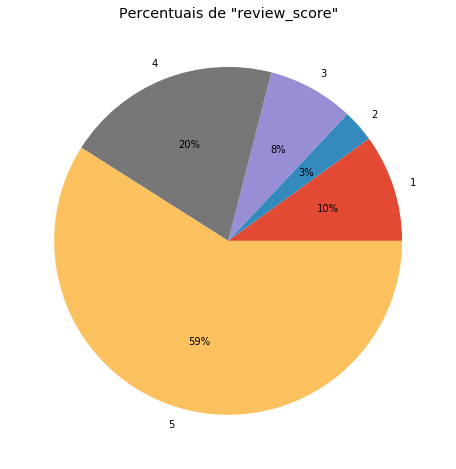

In [86]:
percentual = [10, 3, 8, 20, 59]
labels_list = ['1', '2' ,'3', '4', '5']
# plt.axis('equal')
plt.figure(figsize = (8, 8))
plt.pie(percentual, labels = labels_list, autopct='%1.f%%')
plt.title('Percentuais de "review_score"')
plt.show()

In [87]:
# 1 + 2 + 3 = 21.38%
# 4 + 5 = 78.62%

### 4.10 -  Boxplots

In [88]:
quantitativas.head()

,qtde_boleto,qtde_credit_card,qtde_debit_card,qtde_voucher,soma_payment,qtde_installments,AR_MUN_2018,POPULAÇÃO ESTIMADA,PIB,gini,dias
0,0,1,0,0,219.63,10,881.06,7037,"180,088.78",0.65,21.11
1,0,1,0,0,135.59,1,881.06,7037,"180,088.78",0.65,5.84
2,1,0,0,0,58.28,1,881.06,7037,"180,088.78",0.65,8.63
3,0,1,0,0,"1,025.52",8,"1,045.13",18427,"287,984.49",0.73,29.10
4,0,1,0,0,220.97,4,"1,817.07",23574,"430,235.36",0.66,4.80


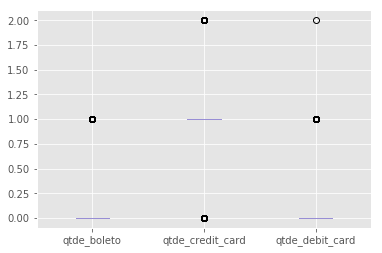

<Figure size 360x360 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column=['qtde_boleto', 'qtde_credit_card', 'qtde_debit_card'])
plt.figure(figsize=(5,5))
plt.show()

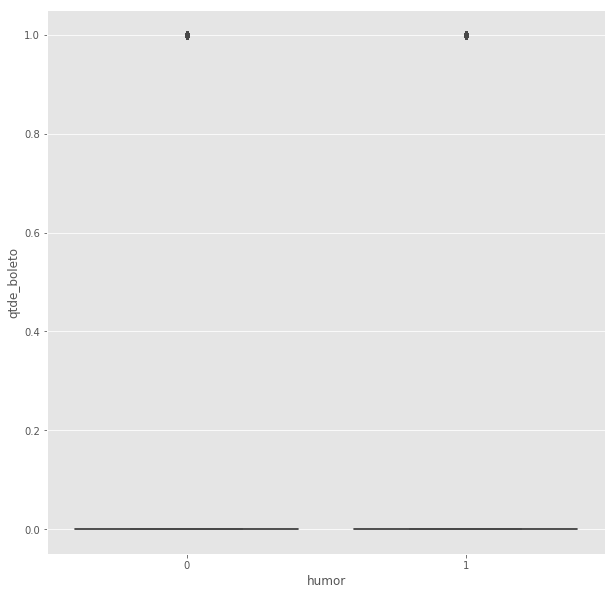

In [90]:
#análise bivariada 'qtde_boleto' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_boleto'], x=quantitativas_humor['humor'])
plt.show()

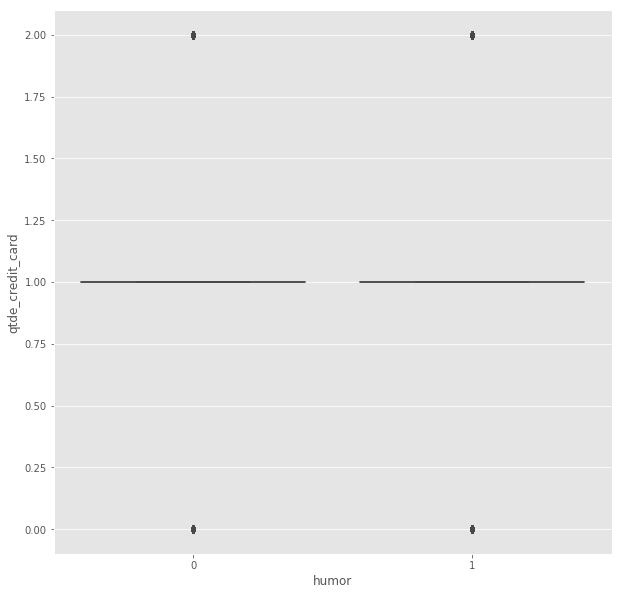

In [91]:
#análise bivariada 'qtde_credit_card' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_credit_card'], x=quantitativas_humor['humor'])
plt.show()

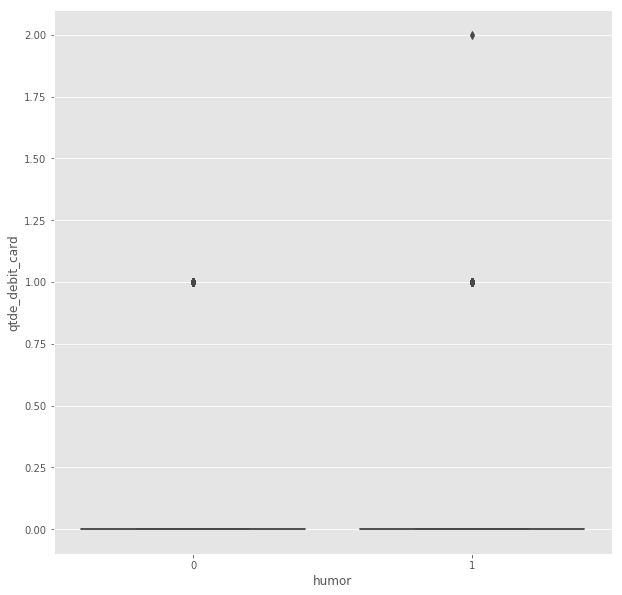

In [92]:
#análise bivariada 'qtde_debit_card' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_debit_card'], x=quantitativas_humor['humor'])
plt.show()

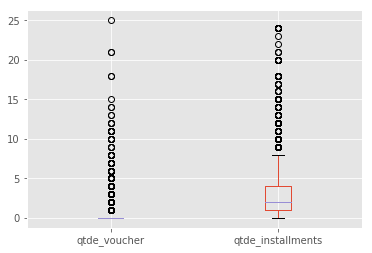

In [93]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column=['qtde_voucher',  'qtde_installments'])
plt.show()

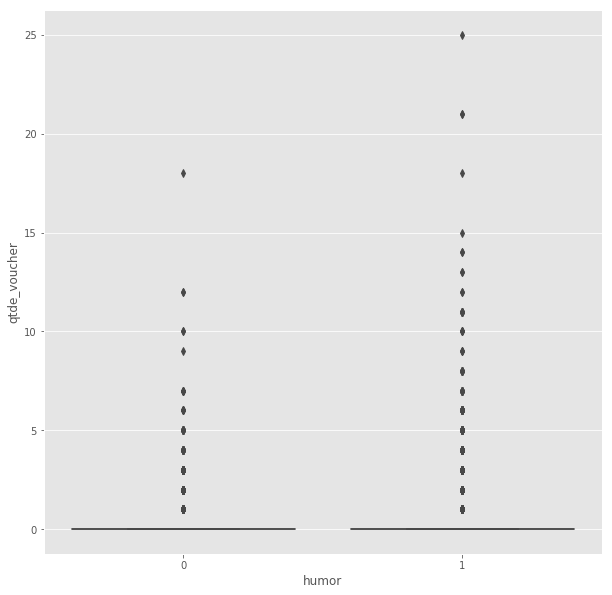

In [94]:
#análise bivariada 'qtde_voucher' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_voucher'], x=quantitativas_humor['humor'])
plt.show()

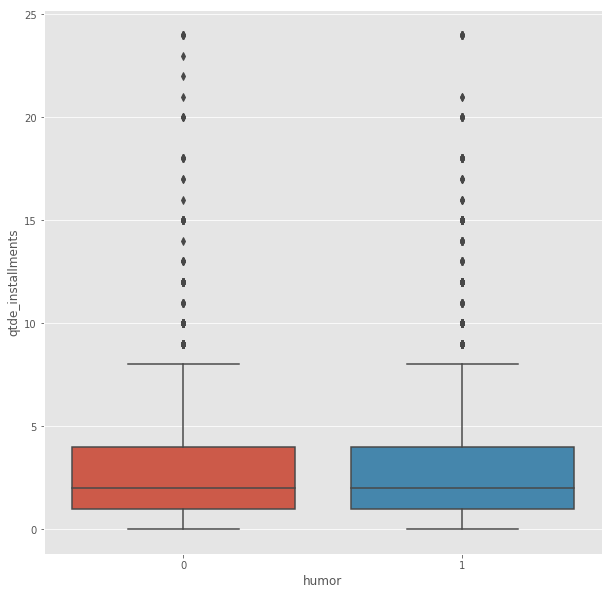

In [95]:
#análise bivariada 'qtde_installments' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_installments'], x=quantitativas_humor['humor'])
plt.show()

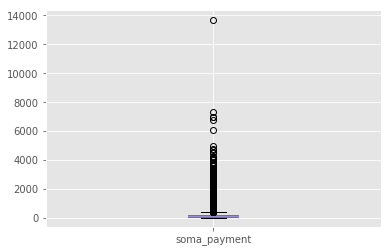

In [96]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column='soma_payment')
plt.show()

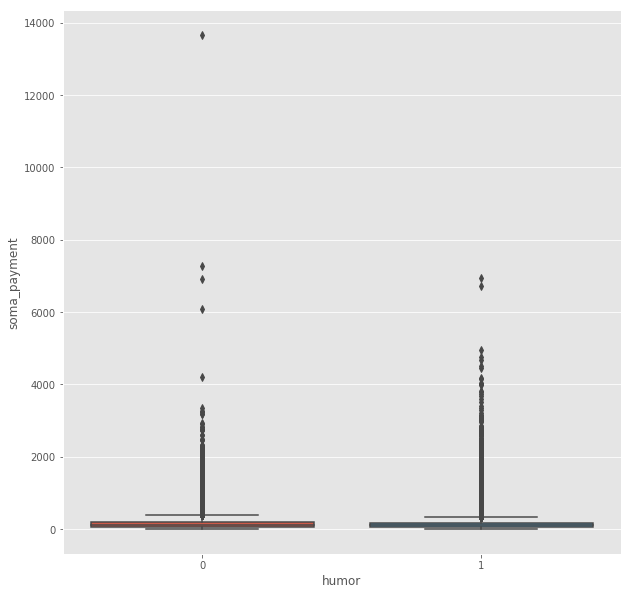

In [97]:
#análise bivariada 'soma_payment' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['soma_payment'], x=quantitativas_humor['humor'])
plt.show()

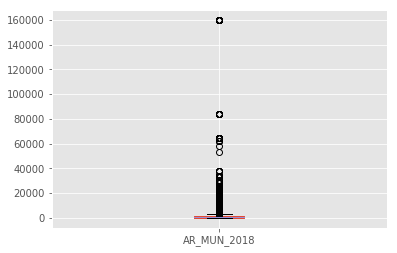

In [98]:
quantitativas.boxplot(column='AR_MUN_2018')
plt.show()

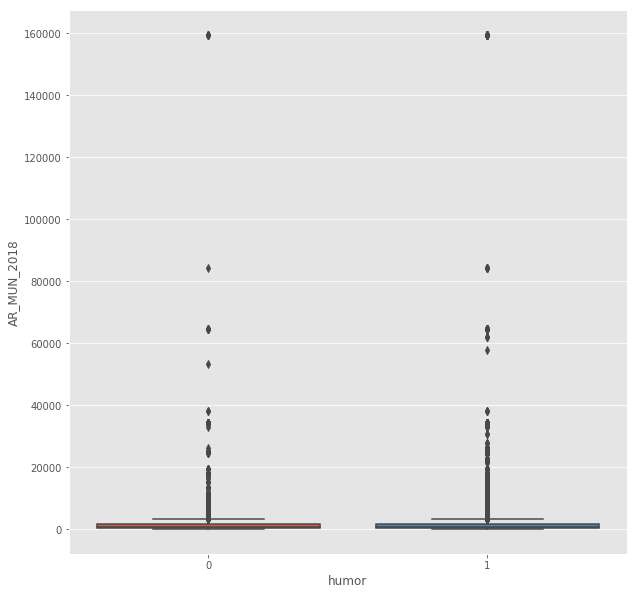

In [99]:
#análise bivariada 'AR_MUN_2018' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['AR_MUN_2018'], x=quantitativas_humor['humor'])
plt.show()

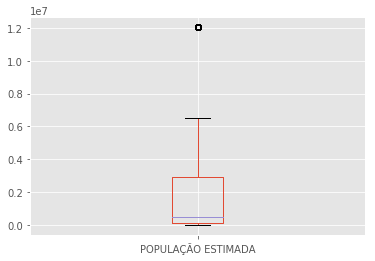

In [100]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column='POPULAÇÃO ESTIMADA')
plt.show()

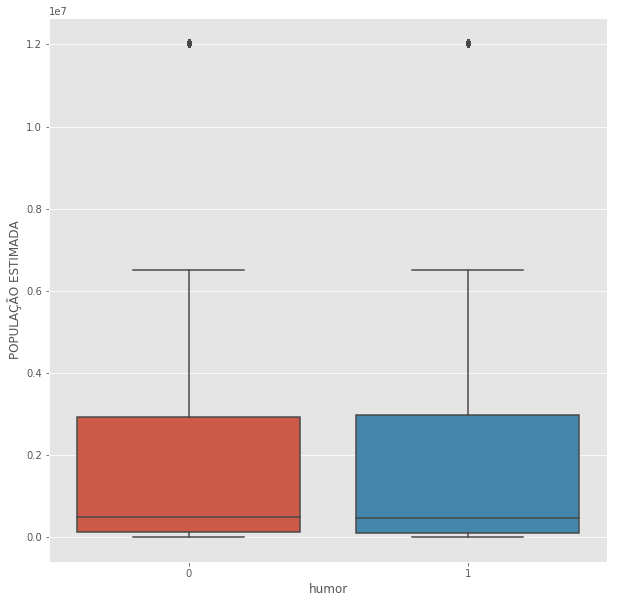

In [101]:
#análise bivariada 'POPULAÇÃO ESTIMADA' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['POPULAÇÃO ESTIMADA'], x=quantitativas_humor['humor'])
plt.show()

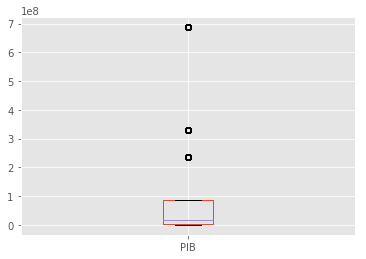

In [102]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column='PIB')
plt.show()

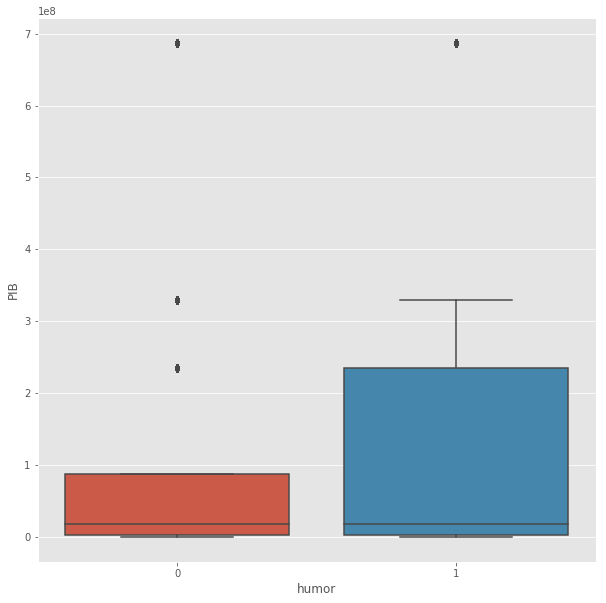

In [103]:
#análise bivariada 'PIB' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['PIB'], x=quantitativas_humor['humor'])
plt.show()

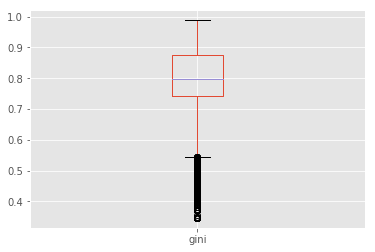

In [104]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column='gini')
plt.show()

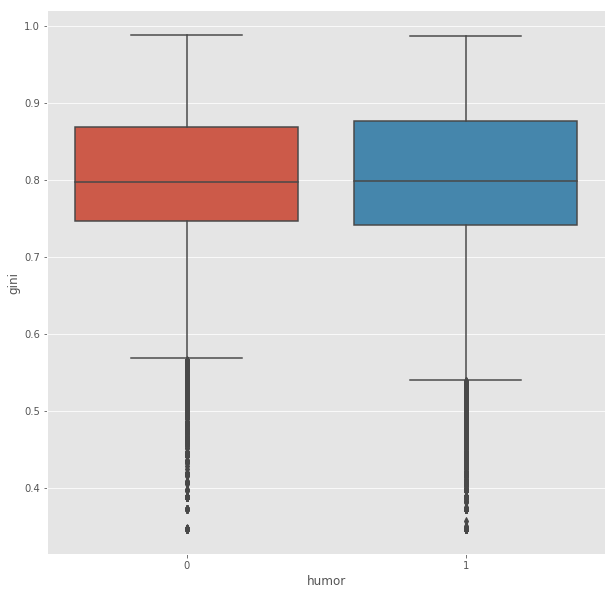

In [105]:
#análise bivariada 'gini' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['gini'], x=quantitativas_humor['humor'])
plt.show()

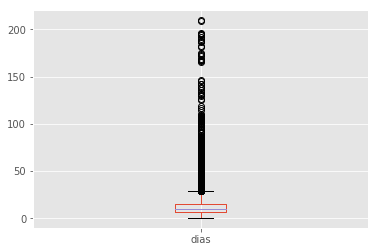

In [106]:
import matplotlib.pyplot as plt
quantitativas.boxplot(column='dias')
plt.show()

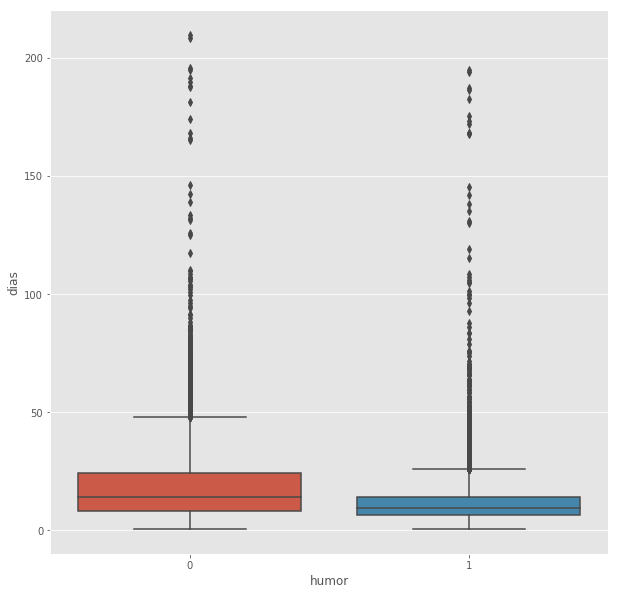

In [107]:
#análise bivariada 'dias' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['dias'], x=quantitativas_humor['humor'])
plt.show()

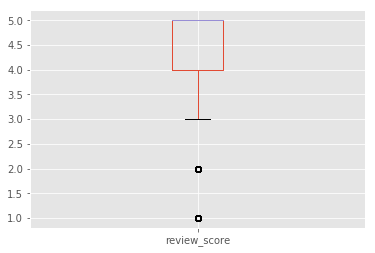

In [108]:
import matplotlib.pyplot as plt
olist_ibge_v13.boxplot(column='review_score')
plt.show()

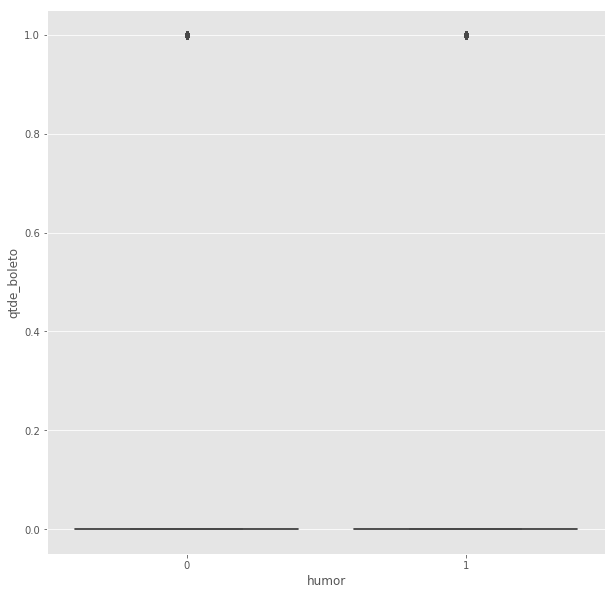

In [109]:
#análise bivariada 'qtde_boleto' e 'humor'
plt.subplots(figsize=(10,10))
sns.boxplot(y=quantitativas_humor['qtde_boleto'], x=quantitativas_humor['humor'])
plt.show()

### Análise bivariada de variáveis QUALITATIVAS

In [110]:
olist_ibge_v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 19 columns):
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
review_score             92935 non-null int64
qtde_boleto              92935 non-null int64
qtde_credit_card         92935 non-null int64
qtde_debit_card          92935 non-null int64
qtde_voucher             92935 non-null int64
soma_payment             92935 non-null float64
qtde_installments        92935 non-null int64
AR_MUN_2018              92935 non-null float64
POPULAÇÃO ESTIMADA       92935 non-null int64
PIB                      92935 non-null float64
gini                     92935 non-null float64
dias                     92935 non-null float64
humor                    92935 non-null int64
d

In [111]:
#análise bivariada 'product_id' e 'humor'
# plt.subplots(figsize=(10,10))
# sns.boxplot(y=olist_ibge_v13['product_id'], x=olist_ibge_v13['humor'])
# plt.show()

# Com 14 variáveis o processamento demora muuuuito... Interrompi depois de 10 minutos de espera. 

# Aliás, acabo de descobrir que boxplot só funciona para variáveis quantitativas. Daahhhhhhh!!!!

In [112]:
# Para usar na análise bivariada, criamos o DataFrame abaixo. 
# Diminui o tempo de processamento, pois há menor número de colunas.
qualitativas_humor = olist_ibge_v13[['product_id',
       'seller_id', 'product_category_name', 'sigla_state', 'seller_sigla_state', 'humor']] 

In [113]:
qualitativas_humor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 6 columns):
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
humor                    92935 non-null int64
dtypes: int64(1), object(5)
memory usage: 4.3+ MB


In [114]:
# Análise bivariada com variáveis categóricas confrontadas com o target

import matplotlib.pyplot as plt
import seaborn as sns

# É preciso, primeiro, eliminar os registros duplicados do DataFrame contendo somente as duas variáveis confrontadas

### Product_id

In [115]:
humores_de_produtos = qualitativas_humor[['product_id', 'humor']] # DataFrame só com os dois campos (tem repetidos)

In [116]:
humores_de_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
product_id    92935 non-null object
humor         92935 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [117]:
# Elimina duplicados
sem_duplicados = humores_de_produtos.drop_duplicates() 

In [118]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36550 entries, 0 to 92934
Data columns (total 2 columns):
product_id    36550 non-null object
humor         36550 non-null int64
dtypes: int64(1), object(1)
memory usage: 856.6+ KB


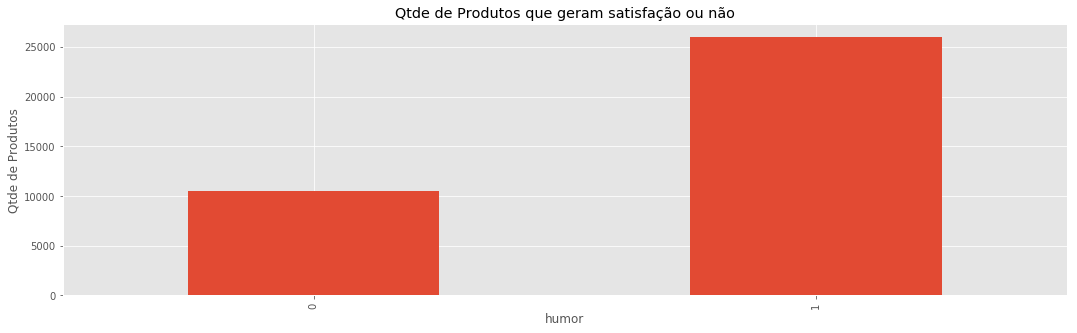

In [119]:
# 

plt.title("Qtde de Produtos que geram satisfação ou não")
plt.xlabel("Humor")
plt.ylabel("Qtde de Produtos")

sem_duplicados.groupby(['humor']).product_id.count().plot(kind='bar', figsize=(18,5))

In [120]:
sem_duplicados.groupby(['humor']).product_id.count()

humor
0    10523
1    26027
Name: product_id, dtype: int64

### Seller_id

In [121]:
humores_de_vendedores = qualitativas_humor[['seller_id', 'humor']] # DataFrame só com os dois campos (tem repetidos)

In [122]:
humores_de_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
seller_id    92935 non-null object
humor        92935 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [123]:
# Elimina duplicados
sem_duplicados = humores_de_vendedores.drop_duplicates() 

In [124]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4654 entries, 0 to 92867
Data columns (total 2 columns):
seller_id    4654 non-null object
humor        4654 non-null int64
dtypes: int64(1), object(1)
memory usage: 109.1+ KB


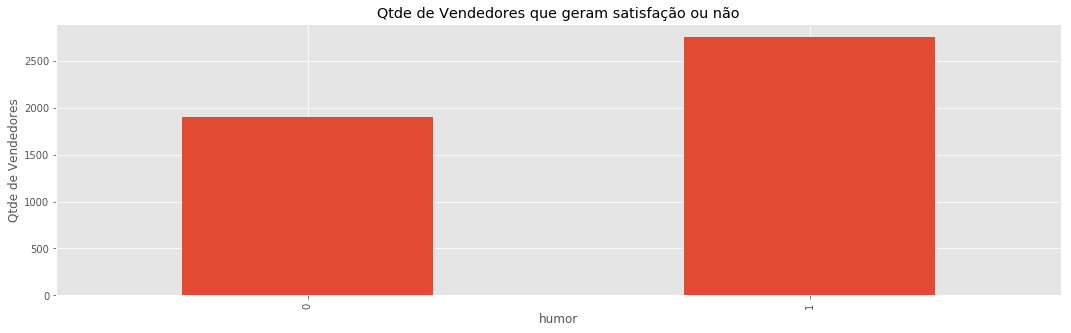

In [125]:
# 

plt.title("Qtde de Vendedores que geram satisfação ou não")
plt.xlabel("Humor")
plt.ylabel("Qtde de Vendedores")

sem_duplicados.groupby(['humor']).seller_id.count().plot(kind='bar', figsize=(18,5))

In [126]:
sem_duplicados.groupby(['humor']).seller_id.count()

humor
0    1896
1    2758
Name: seller_id, dtype: int64

### Product_category_name

In [127]:
humores_de_categorias = qualitativas_humor[['product_category_name', 'humor']] # DataFrame só com os dois campos (tem repetidos)

In [128]:
humores_de_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
product_category_name    92935 non-null object
humor                    92935 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [129]:
# Elimina duplicados
sem_duplicados = humores_de_categorias.drop_duplicates() 

In [130]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 66458
Data columns (total 2 columns):
product_category_name    145 non-null object
humor                    145 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


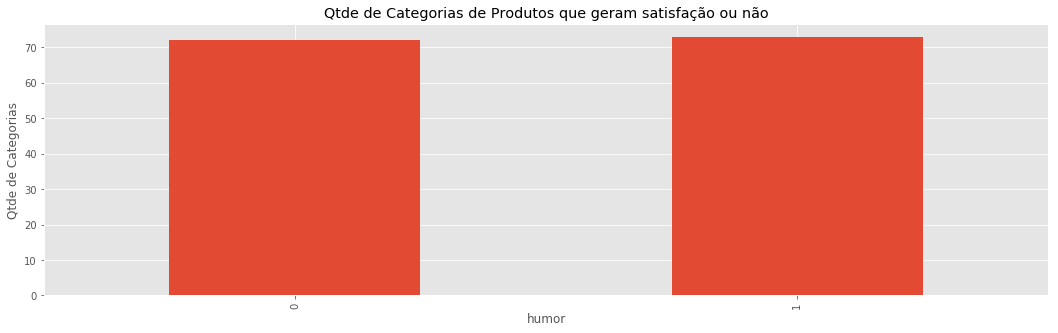

In [131]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Categorias de Produtos que geram satisfação ou não")
plt.xlabel("Humor")
plt.ylabel("Qtde de Categorias")

sem_duplicados.groupby(['humor']).product_category_name.count().plot(kind='bar', figsize=(18,5))

In [132]:
sem_duplicados.groupby(['humor']).product_category_name.count()

humor
0    72
1    73
Name: product_category_name, dtype: int64

### Sigla_state

In [133]:
humores_de_estados = qualitativas_humor[['sigla_state', 'humor']] # DataFrame só com os dois campos (tem repetidos)

In [134]:
humores_de_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
sigla_state    92935 non-null object
humor          92935 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [135]:
# Elimina duplicados
sem_duplicados = humores_de_estados.drop_duplicates() 

In [136]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 37382
Data columns (total 2 columns):
sigla_state    54 non-null object
humor          54 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


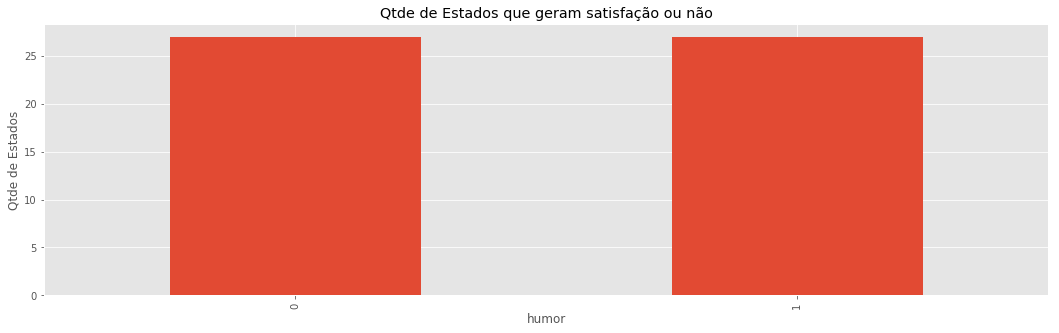

In [137]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Estados que geram satisfação ou não")
plt.xlabel("Humor")
plt.ylabel("Qtde de Estados")

sem_duplicados.groupby(['humor']).sigla_state.count().plot(kind='bar', figsize=(18,5))

In [138]:
sem_duplicados.groupby(['humor']).sigla_state.count()

humor
0    27
1    27
Name: sigla_state, dtype: int64

### Seller_sigla_state

In [139]:
humores_de_estados_vendedores = qualitativas_humor[['seller_sigla_state', 'humor']] # DataFrame só com os dois campos (tem repetidos)

In [140]:
humores_de_estados_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
seller_sigla_state    92935 non-null object
humor                 92935 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [141]:
# Elimina duplicados
sem_duplicados = humores_de_estados_vendedores.drop_duplicates() 

In [142]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 67831
Data columns (total 2 columns):
seller_sigla_state    44 non-null object
humor                 44 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


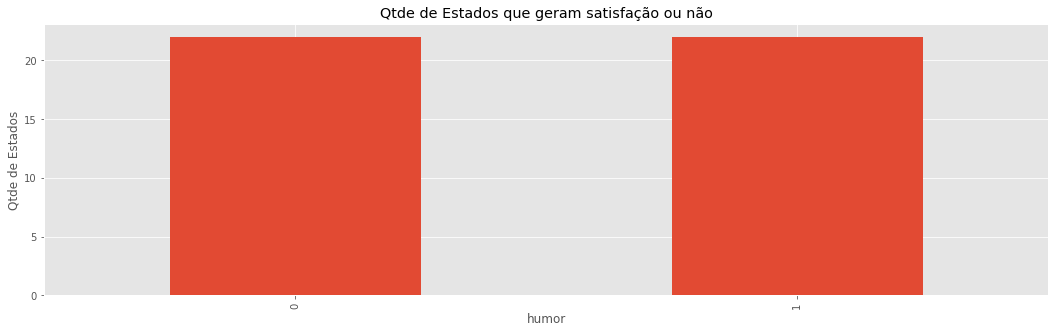

In [143]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Estados que geram satisfação ou não")
plt.xlabel("Humor")
plt.ylabel("Qtde de Estados")

sem_duplicados.groupby(['humor']).seller_sigla_state.count().plot(kind='bar', figsize=(18,5))

In [144]:
sem_duplicados.groupby(['humor']).seller_sigla_state.count()

humor
0    22
1    22
Name: seller_sigla_state, dtype: int64

# <font color=green>'FECHA Parêntese após excluir coluna 'humor' </font>  
> Esta incursão, de incluir a coluna 'humor' e excluí-la, deveu-se ao fato de que, ao inicialmente preparar este notebook, não foram realizadas essas operações. Mas, lá na frente, descobriu-se que eram necessárias.  

> Então, considerando que o DataFrame final deste notebook alimentará outros, e para não ocorrer um cataclisma nos códigos Python até aqui elaborados, optou-se por efetuar esse 'ajuste'.

In [145]:
olist_ibge_v13 = olist_ibge_v13.drop(['humor'], axis=1)

## 5 -  AED das variáveis qualitativas

### 5.1 -  Criação de dataframe com variáveis qualitativas  

In [146]:
olist_ibge_v13.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state', 'review_score', 'qtde_boleto',
       'qtde_credit_card', 'qtde_debit_card', 'qtde_voucher', 'soma_payment',
       'qtde_installments', 'AR_MUN_2018', 'POPULAÇÃO ESTIMADA', 'PIB', 'gini',
       'dias'],
      dtype='object')

In [147]:
qualitativas = olist_ibge_v13[['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state']]            

In [148]:
qualitativas.head()

,order_id,product_id,seller_id,product_category_name,sigla_state,seller_sigla_state
0,50ba38c4dc467baab1ea2c8c7747934d,418d480693f2f01e9cf4568db0346d28,12b9676b00f60f3b700e83af21824c0e,cool_stuff,mg,rs
1,d99e6849f7676dade195f20c26f0eb4f,1081ae52311daac87fb54ba8ce4670ac,4371b634e0efc0e22b09b52907d9d469,esporte_lazer,mg,sp
2,0a9a43ac5fe59c6c4bee2a8f9b9fcce8,c1aabbb6f4caec9f5bf7cd80519d6cc0,579891617139df7d8671d373f0669622,livros_interesse_geral,mg,rj
3,3f1294f87d79b57f5d55ba7b80c3d94f,0a9b9a871ffaec6c0198334558a6c6a1,f9244d45189d3a3605499abddeade7d5,eletroportateis,go,sp
4,6c12feac9a308e1382d9b19cca7f20b2,d47821b10559fffaefcf3e57d2b5ff76,0df3984f9dfb3d49ac6366acbd3bbb85,beleza_saude,mg,mg


In [149]:
qualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 6 columns):
order_id                 92935 non-null object
product_id               92935 non-null object
seller_id                92935 non-null object
product_category_name    92935 non-null object
sigla_state              92935 non-null object
seller_sigla_state       92935 non-null object
dtypes: object(6)
memory usage: 4.3+ MB


### 5.2 Valores únicos

In [150]:
qualitativas.columns

Index(['order_id', 'product_id', 'seller_id', 'product_category_name',
       'sigla_state', 'seller_sigla_state'],
      dtype='object')

In [151]:
print('qtde de valores únicos de order_id é ', len(qualitativas['order_id'].unique()))
print('qtde de valores únicos de product_id é ', len(qualitativas['product_id'].unique()))
print('qtde de valores únicos de seller_id é ', len(qualitativas['seller_id'].unique()))
print('qtde de valores únicos de product_category_name é ', len(qualitativas['product_category_name'].unique()))
print('qtde de valores únicos de sigla_state é ', len(qualitativas['sigla_state'].unique()))
print('qtde de valores únicos de seller_sigla_state é ', len(qualitativas['seller_sigla_state'].unique()))

qtde de valores únicos de order_id é  92935
qtde de valores únicos de product_id é  30151
qtde de valores únicos de seller_id é  2887
qtde de valores únicos de product_category_name é  73
qtde de valores únicos de sigla_state é  27
qtde de valores únicos de seller_sigla_state é  22


In [152]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "valores_unicos_qualitativas.PNG")

### 5.3 Gráficos de Barra

#### 5.3.1 sigla_state x order_id

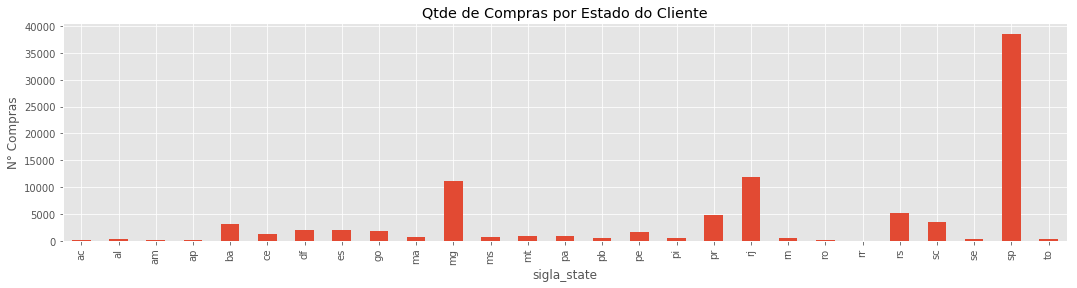

In [153]:
# qualitativas.hist(column='sigla_state', bins = 10)

plt.title("Qtde de Compras por Estado do Cliente")
plt.xlabel("Estados")
plt.ylabel("N° Compras")

qualitativas.groupby(['sigla_state']).order_id.count().plot(kind='bar', figsize=(18,4))

#### 5.3.2 seller_sigla_state x order_id

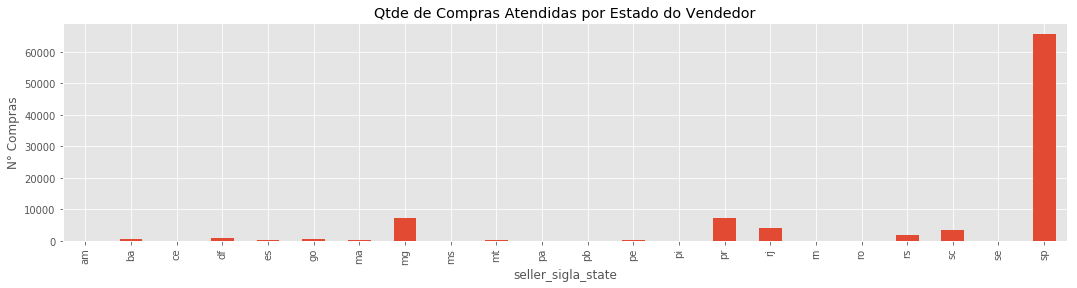

In [154]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Compras Atendidas por Estado do Vendedor")
plt.xlabel("Estados dos Vendedores")
plt.ylabel("N° Compras")

qualitativas.groupby(['seller_sigla_state']).order_id.count().plot(kind='bar', figsize=(18,4))

#### 5.3.3 product_category_name x order_id

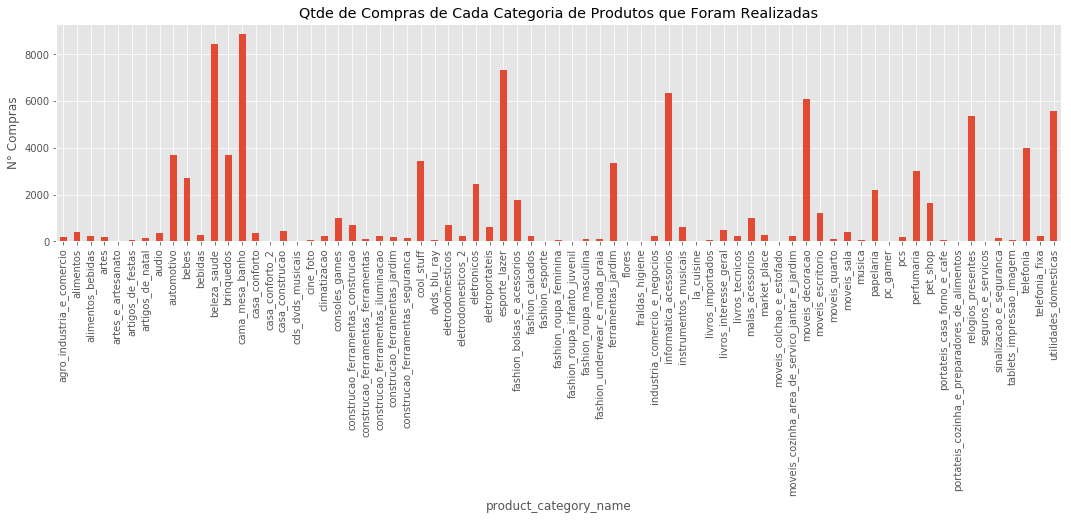

In [155]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Compras de Cada Categoria de Produtos que Foram Realizadas")
plt.xlabel("Categoria de Produtos")
plt.ylabel("N° Compras")

qualitativas.groupby(['product_category_name']).order_id.count().plot(kind='bar', figsize=(18,4))

#### 5.3.4 product_category_name x product_id

In [156]:
produtos_de_categorias = qualitativas[['product_category_name', 'product_id']] # DataFrame só com os dois campos (tem repetidos)

In [157]:
produtos_de_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
product_category_name    92935 non-null object
product_id               92935 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [158]:
# Elimina duplicados
sem_duplicados = produtos_de_categorias.drop_duplicates() 

In [159]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30151 entries, 0 to 92933
Data columns (total 2 columns):
product_category_name    30151 non-null object
product_id               30151 non-null object
dtypes: object(2)
memory usage: 706.7+ KB


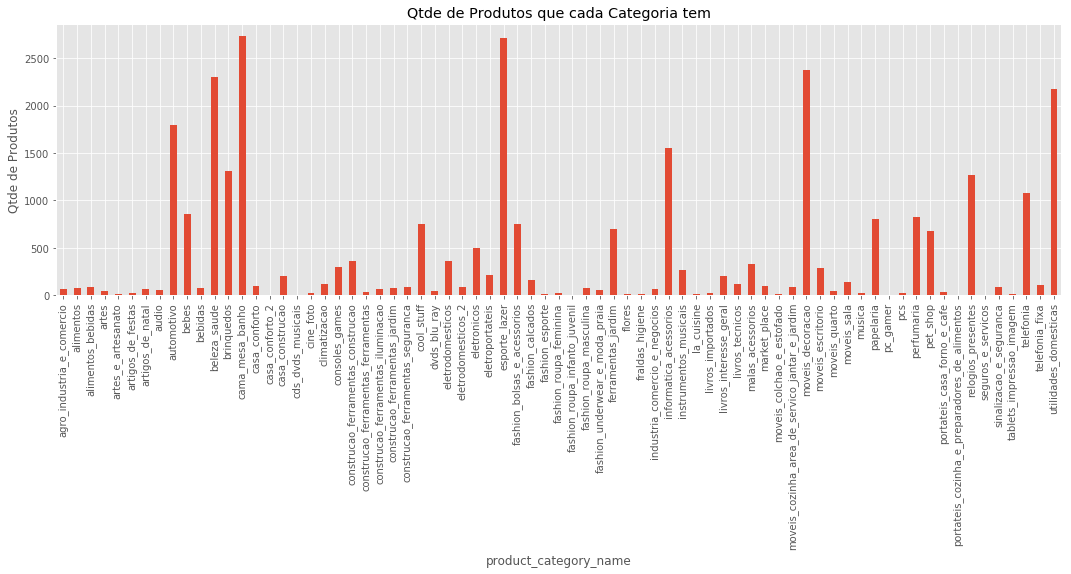

In [160]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Produtos que cada Categoria tem")
plt.xlabel("Categoria de Produto")
plt.ylabel("Qtde de Produtos")

sem_duplicados.groupby(['product_category_name']).product_id.count().plot(kind='bar', figsize=(18,5))

#### 5.3.5 product_category_name x seller_id

In [161]:
sellers_de_categorias = qualitativas[['seller_id', 'product_category_name']] # DataFrame só com os dois campos (tem repetidos)

In [162]:
sellers_de_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
seller_id                92935 non-null object
product_category_name    92935 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [163]:
# Elimina duplicados
sem_duplicados = sellers_de_categorias.drop_duplicates() 

In [164]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6058 entries, 0 to 92867
Data columns (total 2 columns):
seller_id                6058 non-null object
product_category_name    6058 non-null object
dtypes: object(2)
memory usage: 142.0+ KB


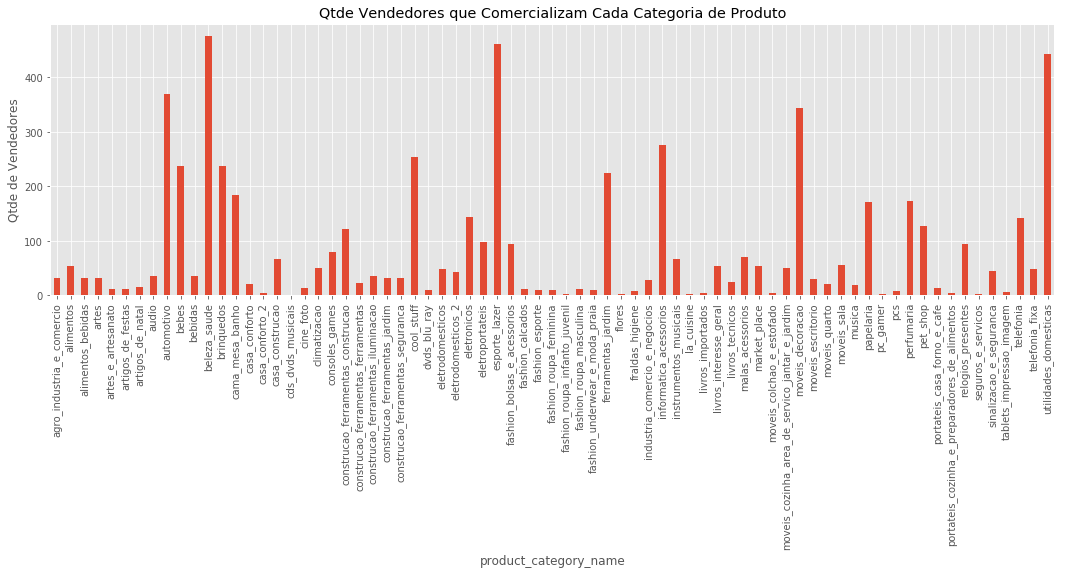

In [165]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde Vendedores que Comercializam Cada Categoria de Produto")
plt.xlabel("Categoria de Produto")
plt.ylabel("Qtde de Vendedores")

sem_duplicados.groupby(['product_category_name']).seller_id.count().plot(kind='bar', figsize=(18,5))

#### 5.3.6 sigla_state x product_id

In [166]:
produtos_de_estados = qualitativas[['sigla_state', 'product_id']] # DataFrame só com os dois campos (tem repetidos)

In [167]:
produtos_de_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
sigla_state    92935 non-null object
product_id     92935 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [168]:
# Elimina duplicados
sem_duplicados = produtos_de_estados.drop_duplicates() 

In [169]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56104 entries, 0 to 92934
Data columns (total 2 columns):
sigla_state    56104 non-null object
product_id     56104 non-null object
dtypes: object(2)
memory usage: 1.3+ MB


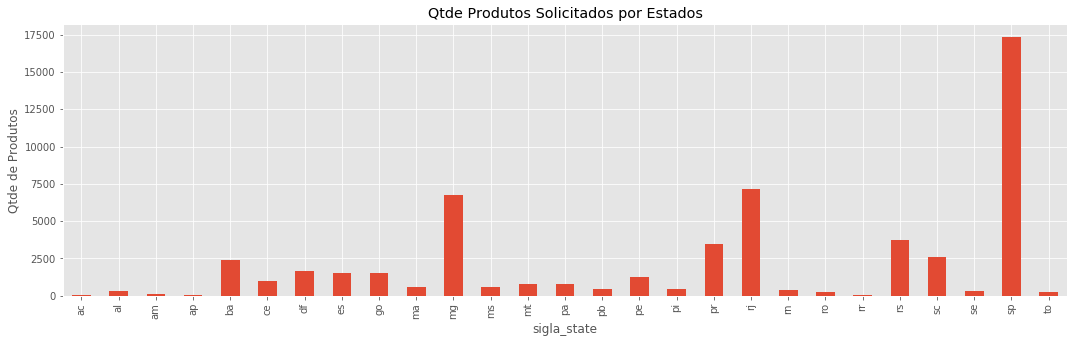

In [170]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde Produtos Solicitados por Estados")
plt.xlabel("Estados")
plt.ylabel("Qtde de Produtos")

sem_duplicados.groupby(['sigla_state']).product_id.count().plot(kind='bar', figsize=(18,5))

#### 5.3.7 sigla_state x seller_id

In [171]:
vendedores_de_estado = qualitativas[['sigla_state', 'seller_id']] # DataFrame só com os dois campos (tem repetidos)

In [172]:
vendedores_de_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92935 entries, 0 to 92934
Data columns (total 2 columns):
sigla_state    92935 non-null object
seller_id      92935 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [173]:
# Elimina duplicados
sem_duplicados = vendedores_de_estado.drop_duplicates() 

In [174]:
sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16623 entries, 0 to 92932
Data columns (total 2 columns):
sigla_state    16623 non-null object
seller_id      16623 non-null object
dtypes: object(2)
memory usage: 389.6+ KB


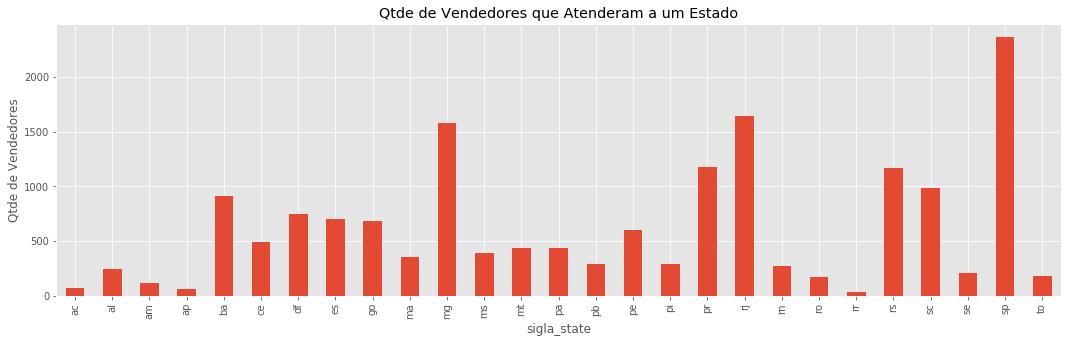

In [175]:
# qualitativas.hist(column='seller_sigla_state', bins = 10)

plt.title("Qtde de Vendedores que Atenderam a um Estado")
plt.xlabel("Estados")
plt.ylabel("Qtde de Vendedores")

sem_duplicados.groupby(['sigla_state']).seller_id.count().plot(kind='bar', figsize=(18,5))

In [176]:
# Exportação 
# olist_ibge_v13.to_excel("olist_ibge_v13.xlsx")